## Classification and Regression with Random Forest

### Description

`randomForest` implements Breiman's random forest algorithm (based on Breiman and Cutler's original Fortran code) for classification and regression. It can also be used in unsupervised mode for assessing proximities among data points.

randomForest实现Breiman的随机森林算法(基于Breiman和Cutler的原始Fortran代码)用于分类和回归。它也可以在无监督模式下用于评估数据点之间的相似性。

理论参见：
- Greenwell, B.M. Tree-Based Methods for Statistical Learning in R. 2022.
- https://easyai.tech/ai-definition/random-forest/
- https://zhuanlan.zhihu.com/p/86263786
- https://zhuanlan.zhihu.com/p/28217071

### Usage

```
## S3 method for class 'formula'
randomForest(formula, data=NULL, ..., subset, na.action=na.fail)
## Default S3 method:
randomForest(x, y=NULL,  xtest=NULL, ytest=NULL, ntree=500,
             mtry=if (!is.null(y) && !is.factor(y))
             max(floor(ncol(x)/3), 1) else floor(sqrt(ncol(x))),
             weights=NULL,
             replace=TRUE, classwt=NULL, cutoff, strata,
             sampsize = if (replace) nrow(x) else ceiling(.632*nrow(x)),
             nodesize = if (!is.null(y) && !is.factor(y)) 5 else 1,
             maxnodes = NULL,
             importance=FALSE, localImp=FALSE, nPerm=1,
             proximity, OOB.prox=proximity,
             norm.votes=TRUE, do.trace=FALSE,
             keep.forest=!is.null(y) && is.null(xtest), corr.bias=FALSE,
             keep.inbag=FALSE, ...)
## S3 method for class 'randomForest'
print(x, ...)
```

### Arguments
|               |                                                              |
| ------------- | ------------------------------------------------------------ |
| `data`        | an optional data frame containing the variables in the model. By default the variables are taken from the environment which `randomForest` is called from. |
| `subset`      | an index vector indicating which rows should be used. (NOTE: If given, this argument must be named.) |
| `na.action`   | A function to specify the action to be taken if NAs are found. (NOTE: If given, this argument must be named.) |
| `x, formula`  | a data frame or a matrix of predictors, or a formula describing the model to be fitted (for the `print` method, an `randomForest` object). |
| `y`           | 响应向量。如果是因子，则做分类，否则做回归。如果省略，' randomForest '则做无监督学习。A response vector. If a factor, classification is assumed, otherwise regression is assumed. If omitted, `randomForest` will run in unsupervised mode. |
| `xtest`       | a data frame or matrix (like `x`) containing predictors for the test set. |
| `ytest`       | response for the test set.                                   |
| `ntree`       |树的数量。这个值不应该设置得太小，以确保每个输入行至少被预测几次。 Number of trees to grow. This should not be set to too small a number, to ensure that every input row gets predicted at least a few times. |
| `mtry`        |在每一次分裂中候选变量的个数--从所有的特征中随机抽样而得。注意，默认值：对于分类(sqrt(p)， p是x中的变量数量)和回归(p/3)。 Number of variables randomly sampled as candidates at each split. Note that the default values are different for classification (sqrt(p) where p is number of variables in `x`) and regression (p/3) |
| `weights`     | 长度与' y '相同的正值向量，系抽样权重，仅用于对数据点进行采样，生成各棵树(不用于任何其他计算)。A vector of length same as `y` that are positive weights used only in sampling data to grow each tree (not used in any other calculation) |
| `replace`     | 抽样时样本是否放回?Should sampling of cases be done with or without replacement? |
| `classwt`     |各个目标类别所占份额的调整权重(现有数据可能不能体现原貌)。不需要加起来等于1。若忽略则与现有数据的份额相同。--**可以起到代价敏感的作用。** Priors of the classes. Need not add up to one. Ignored for regression. |
| `cutoff`      | 不知道这个做何用(Classification only) A vector of length equal to number of classes. The ‘winning’ class for an observation is the one with the maximum ratio of proportion of votes to cutoff. Default is 1/k where k is the number of classes (i.e., majority vote wins). |
| `strata`      |分层抽样怎么需要这个因子变量？没搞懂 A (factor) variable that is used for stratified sampling.    |
| `sampsize`    | Size(s) of sample to draw. For classification, if sampsize is a vector of the length the number of strata, then sampling is stratified by strata, and the elements of sampsize indicate the numbers to be drawn from the strata. |
| `nodesize`    | 终端节点的包含样例的最小值。将这个数字设置得更大会导致生长出更小的树(因此需要更少的时间)。注意，分类(1)和回归(5)的默认值是不同的。Minimum size of terminal nodes. Setting this number larger causes smaller trees to be grown (and thus take less time). Note that the default values are different for classification (1) and regression (5). |
| `maxnodes`    | 森林中树的最大终端节点数。Maximum number of terminal nodes trees in the forest can have. If not given, trees are grown to the maximum possible (subject to limits by `nodesize`). If set larger than maximum possible, a warning is issued. |
| `importance`  | Should importance of predictors be assessed?                 |
| `localImp`    | Should casewise importance measure be computed? (Setting this to `TRUE` will override `importance`.) |
| `nPerm`       | 每棵树乱排OOB数据的次数，用于评估变量的重要性。大于1的次数给出的估计稍微稳定一些，但不是很有效。目前仅用于回归。Number of times the OOB data are permuted per tree for assessing variable importance. Number larger than 1 gives slightly more stable estimate, but not very effective. Currently only implemented for regression. |
| `proximity`   | Should proximity measure among the rows be calculated?       |
| `OOB.prox`    | Should proximity be calculated only on “out-of-bag” data? defaults to proximity   |
| `norm.votes`  | If `TRUE` (default), the final result of votes are expressed as fractions. If `FALSE`, raw vote counts are returned (useful for combining results from different runs). Ignored for regression. |
| `do.trace`    | If set to `TRUE`, give a more verbose output as `randomForest` is run. If set to some integer, then running output is printed for every `do.trace` trees. |
| `keep.forest` | If set to `FALSE`, the forest will not be retained in the output object. If `xtest` is given, defaults to `FALSE`. |
| `corr.bias`   | perform bias correction for regression? Note: Experimental. Use at your own risk. 没搞清楚原理|
| `keep.inbag`  | Should an `n` by `ntree` matrix be returned that keeps track of which samples are “in-bag” in which trees (but not how many times, if sampling with replacement) |
| `...`         | optional parameters to be passed to the low level function `randomForest.default`. |

### Value

An object of class `randomForest`, which is a list with the following components:

|                |                                                              |
| -------------- | ------------------------------------------------------------ |
| `call`         | the original call to `randomForest`                          |
| `type`         | one of `regression`, `classification`, or `unsupervised`.    |
| `predicted`    | the predicted values of the input data based on out-of-bag samples. |
| `importance`   | 包含nclass + 2(用于分类)或两列(用于回归)的矩阵。对于分类，前nclass列是针对不同类的度量，计算精度的平均下降。第nclass +1列是所有类的精度下降的平均值。最后一列是基尼系数的平均下降。对于回归，第一列是精度的平均下降，第二列是MSE的平均下降。如果importance=FALSE，最后一个度量值仍然以vector的形式返回。a matrix with `nclass` + 2 (for classification) or two (for regression) columns. For classification, the first `nclass` columns are the class-specific measures computed as mean descrease in accuracy. The `nclass` + 1st column is the mean descrease in accuracy over all classes. The last column is the mean decrease in Gini index. For Regression, the first column is the mean decrease in accuracy and the second the mean decrease in MSE. If `importance=FALSE`, the last measure is still returned as a vector. |
| `importanceSD` | “ermutation-based importance measure”也是随机变量，该值用于衡量该变量的变异范围--标准差。The “standard errors” of the permutation-based importance measure. For classification, a `p` by `nclass + 1` matrix corresponding to the first `nclass + 1` columns of the importance matrix. For regression, a length `p` vector. |
| `localImp`     | 用于衡量该变量针对于每一个样例预测的重要性。a p by n matrix containing the casewise importance measures, the [i,j] element of which is the importance of i-th variable on the j-th case. `NULL` if `localImp=FALSE`. |
| `ntree`        | number of trees grown.                                       |
| `mtry`         | number of predictors sampled for spliting at each node.      |
| `forest`       | (a list that contains the entire forest; `NULL` if `randomForest` is run in unsupervised mode or if `keep.forest=FALSE`. |
| `err.rate`     | (classification only) vector error rates of the prediction on the input data, the i-th element being the (OOB) error rate for all trees up to the i-th. |
| `confusion`    | (classification only) the confusion matrix of the prediction (based on OOB data). |
| `votes`        | (classification only) a matrix with one row for each input data point and one column for each class, giving the fraction or number of (OOB) ‘votes’ from the random forest. |
| `OOB.times`    | number of times cases are ‘out-of-bag’ (and thus used in computing OOB error estimate) |
| `proximity`    | if `proximity=TRUE` when `randomForest` is called, a matrix of proximity measures among the input (based on the frequency that pairs of data points are in the same terminal nodes). |
| `mse`          | (regression only) vector of mean square errors: sum of squared residuals divided by `n`. |
| `rsq`          | (regression only) “pseudo R-squared”: 1 - `mse` / Var(y).    |
| `test`         | if test set is given (through the `xtest` or additionally `ytest` arguments), this component is a list which contains the corresponding `predicted`, `err.rate`, `confusion`, `votes` (for classification) or `predicted`, `mse` and `rsq` (for regression) for the test set. If `proximity=TRUE`, there is also a component, `proximity`, which contains the proximity among the test set as well as proximity between test and training data. |

### Note

- The `forest` structure is slightly different between classification and regression. For details on how the trees are stored, see the help page for `getTree`.

- If `xtest` is given, prediction of the test set is done “in place” as the trees are grown. If `ytest` is also given, and `do.trace` is set to some positive integer, then for every `do.trace` trees, the test set error is printed. Results for the test set is returned in the `test` component of the resulting `randomForest` object. For classification, the `votes` component (for training or test set data) contain the votes the cases received for the classes. If `norm.votes=TRUE`, the fraction is given, which can be taken as predicted probabilities for the classes.

- For large data sets, especially those with large number of variables, calling `randomForest` via the formula interface is not advised: There may be too much overhead in handling the formula.对于大型数据集，特别是具有大量变量的数据集，不建议通过公式接口调用randomForest:处理公式时可能会有太多开销。

- The “local” (or casewise) variable importance is computed as follows: For classification, it is the increase in percent of times a case is OOB and misclassified when the variable is permuted. For regression, it is the average increase in squared OOB residuals when the variable is permuted.
- Can not handle categorical predictors with more than 53 categories.

### Author(s)

Andy Liaw [andy_liaw@merck.com](mailto:andy_liaw@merck.com) and Matthew Wiener [matthew_wiener@merck.com](mailto:matthew_wiener@merck.com), based on original Fortran code by Leo Breiman and Adele Cutler.

### References

Breiman, L. (2001), *Random Forests*, Machine Learning 45(1), 5-32.

Breiman, L (2002), “Manual On Setting Up, Using, And Understanding Random Forests V3.1”, https://www.stat.berkeley.edu/~breiman/Using_random_forests_V3.1.pdf.

### See Also

```
predict.randomForest`, `varImpPlot
```

## 算法解析

### 分类：平衡、代价不敏感、无缺失值、特征混合取值
The Abalone data consist of data from 4177 abalones. The data consist of measurements of the type (male, female and infant), the longest shell measurement, the diameter, height and several weights (whole, shucked, viscera and shell). The outcome is the number of rings. The age of the abalone is the number of rings plus 1.5.

将原abalone数据集的“Rings”值改造成"L"、 "H"二个平衡类别，当前的问题是根据一系列特征判断abalone的“Rings”类别。

In [1]:
library(pacman)

options(warn = -1) # 忽略一切警告
options("width" = 140) # 充分利用打印宽度
options(repr.plot.width = 15, repr.plot.height = 10) # 满幅

p_load(rpart)
p_load(randomForest)
p_load(AppliedPredictiveModeling)
p_load(skimr)
s <- skim_tee

In [2]:
#将数据改造成平衡的二类(Rings)
data(abalone)
ab <- abalone
ab$Rings <- factor((ab$Rings) > 9, labels = c("L", "H")) # 处理成二类，逻辑型factor的levels的排序默认是：FALSE,TRUE，分别对应于"L","H"
s(ab)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             4177  
Number of columns          9     
_______________________          
Column type frequency:           
  factor                   2     
  numeric                  7     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts               
1 Type                  0             1 FALSE          3 M: 1528, I: 1342, F: 1307
2 Rings                 0             1 FALSE          2 L: 2096, H: 2081         

── Variable type: numeric ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean     sd     p0    p25   p50   p75  p100 h

In [3]:
# 将数据集1:1随机分割成训练集和测试集
set.seed(100)
I <- sample(nrow(ab), nrow(ab) * 0.5)
train_ab <- ab[I, ]
test_ab <- ab[-I, ]
s(train_ab)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             2088  
Number of columns          9     
_______________________          
Column type frequency:           
  factor                   2     
  numeric                  7     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts            
1 Type                  0             1 FALSE          3 M: 776, I: 675, F: 637
2 Rings                 0             1 FALSE          2 L: 1044, H: 1044      

── Variable type: numeric ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean     sd     p0    p25   p50   p75  p100 hist 
1 Lo

In [5]:
set.seed(71)
(rf_ab <-randomForest(Rings ~ ., data = train_ab, importance = TRUE, proximity = TRUE, localImp = TRUE)) #默认norm.votes=TRUE


Call:
 randomForest(formula = Rings ~ ., data = train_ab, importance = TRUE,      proximity = TRUE, localImp = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 21.12%
Confusion matrix:
    L   H class.error
L 797 247   0.2365900
H 194 850   0.1858238

“OOB estimate of  error rate”是指训练集中的样例用其没有参与生成的决策树判断的error rate

In [6]:
#由xerror 1-SE rule确定最优cp=0.011，详见https://github.com/A-Pai/rpart-solveing/blob/main/1-rpart.ipynb
ctabo <- rpart(Rings ~ ., data = train_ab, method = "class", cp = 0.011) 
#决策树的泛化性能
(error_test_t <- mean(predict(ctabo, test_ab, type = "class") != test_ab$Rings))    #测试集的错误率

#随机森林的泛化性能
(error_test_f <- mean(predict(rf_ab, test_ab) != test_ab$Rings))    #测试集的错误率
#随机森林的泛化性能优于决策树

[1] 0.2192437

[1] 0.2082336

In [8]:
#测试集的混淆矩阵
table(observed = test_ab$Rings, predicted = predict(rf_ab, test_ab) )

        predicted
observed   L   H
       L 812 240
       H 196 841

In [9]:
rf_ab$votes #randomForest函数默认norm.votes=TRUE，返回判别的置信度

,L,H
3786,0.53723404,0.46276596
503,0.05434783,0.94565217
3430,1.00000000,0.00000000
3696,0.13227513,0.86772487
4090,0.67307692,0.32692308
3052,0.27173913,0.72826087
2967,0.21893491,0.78106509
470,0.01648352,0.98351648
1990,1.00000000,0.00000000
1540,0.92485549,0.07514451


In [10]:
set.seed(71)
(rf_ab <- randomForest(Rings ~ ., data = train_ab, importance = TRUE, proximity = TRUE, localImp = TRUE, norm.votes = FALSE))
rf_ab$votes #当上句norm.votes=FALSE时返回返回判定为这个类别的次数


Call:
 randomForest(formula = Rings ~ ., data = train_ab, importance = TRUE,      proximity = TRUE, localImp = TRUE, norm.votes = FALSE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 21.12%
Confusion matrix:
    L   H class.error
L 797 247   0.2365900
H 194 850   0.1858238

,L,H
3786,101,87
503,10,174
3430,176,0
3696,25,164
4090,105,51
3052,50,134
2967,37,132
470,3,179
1990,177,0
1540,160,13


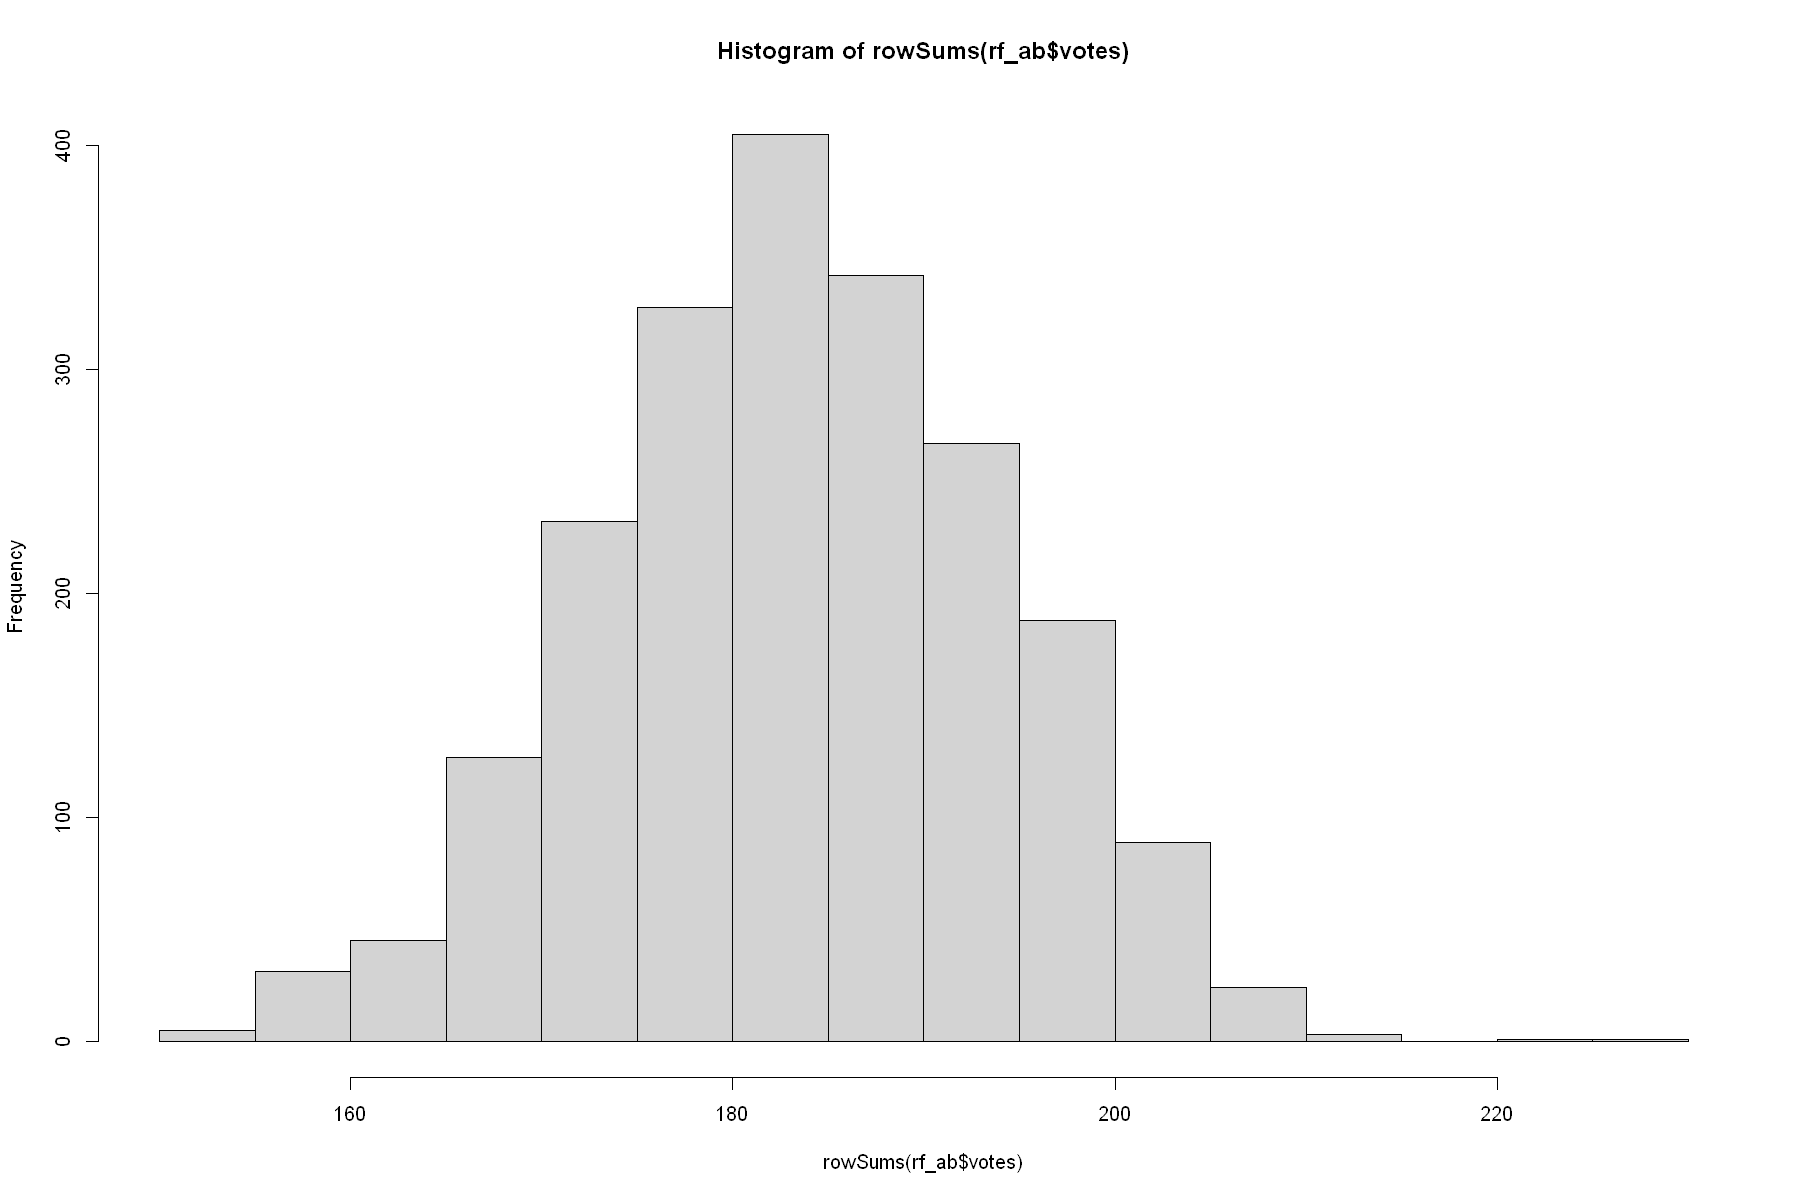

In [10]:
hist(rowSums(rf_ab$votes))  #OOB的次数的分布：由于随机性，每个样例OOB的次数不同

In [11]:
sum(rf_ab$votes)/(nrow(train_ab)*500)  #样例未被抽中(OOB)的概率
#接近1/e=0.3678794

[1] 0.3680096

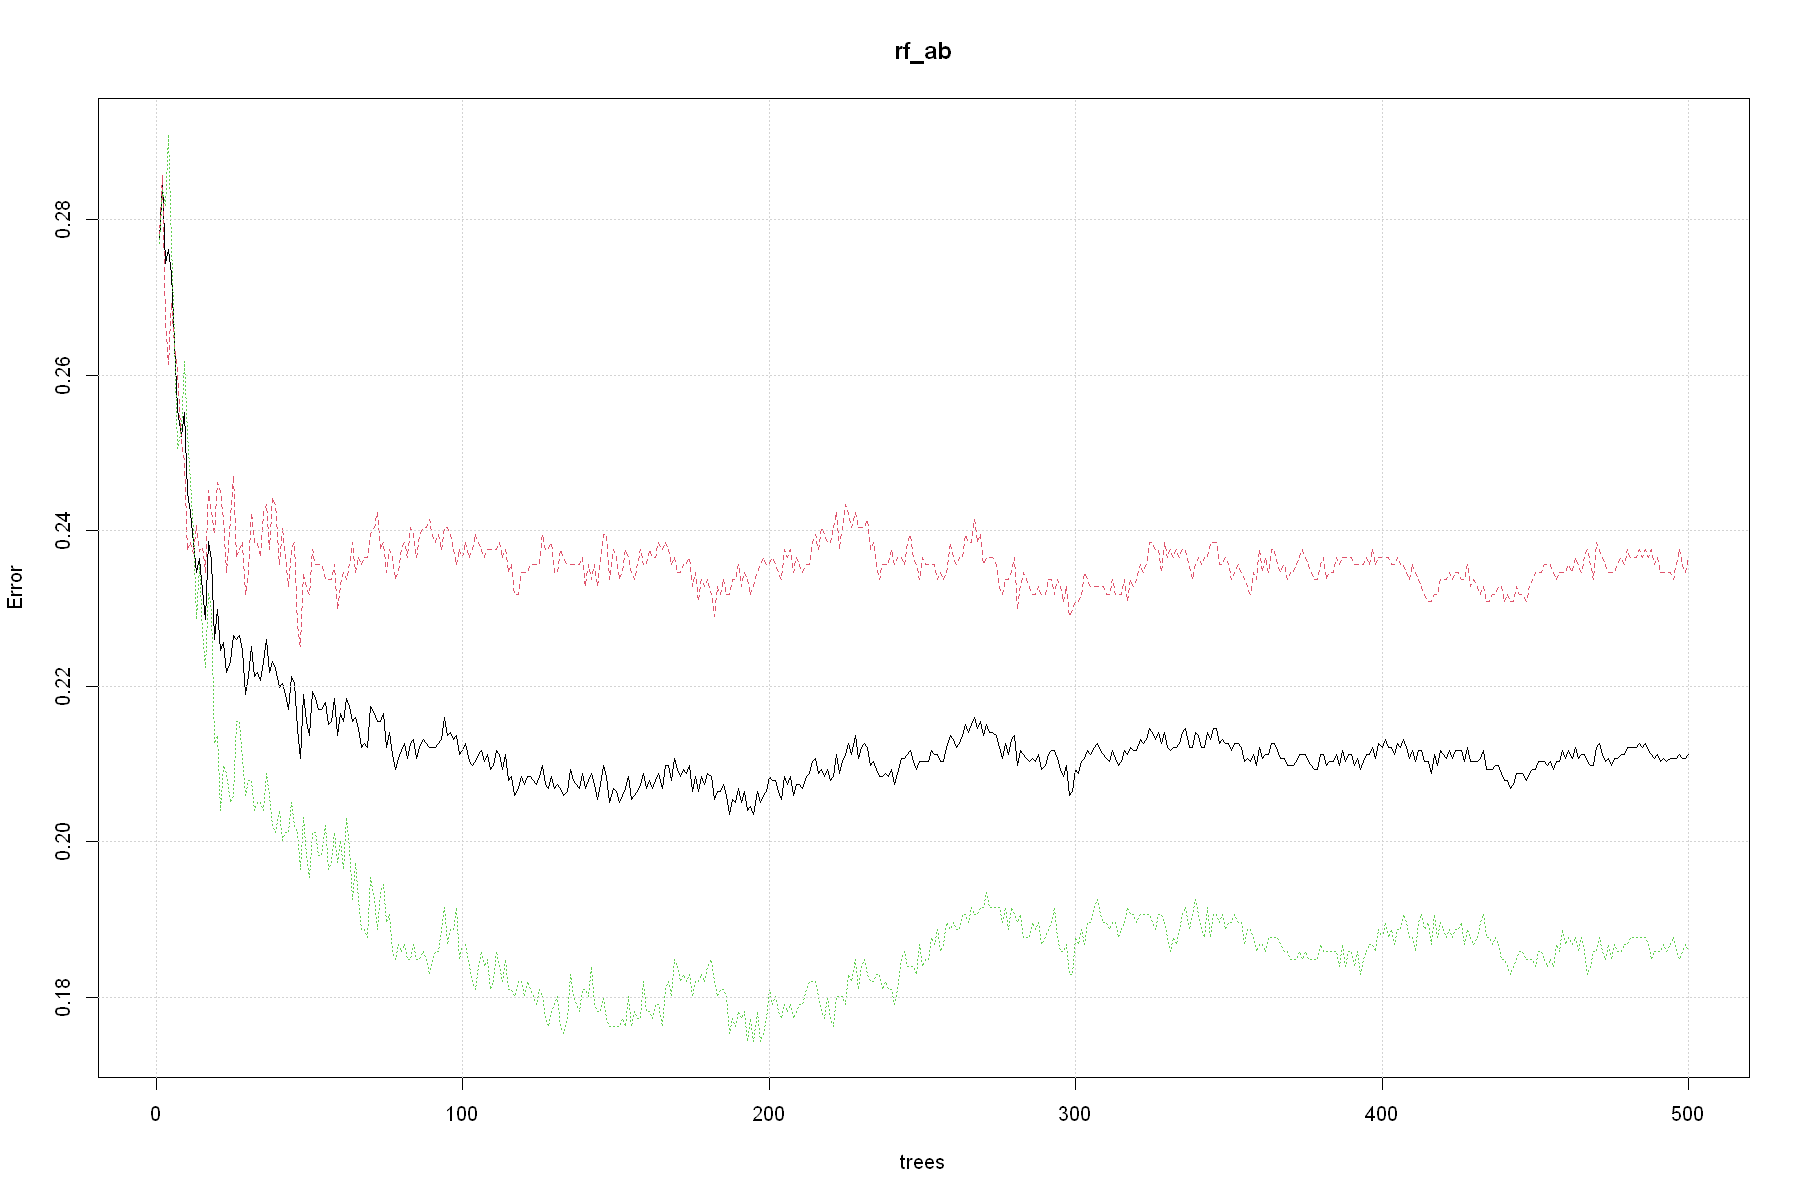

In [12]:
#随着树的增多而收敛,上下曲线对应着二个类别，中间曲线是二者的平均值。
plot(rf_ab)
grid()

In [13]:
# 各个特征的重要性均值:
(vip <- rf_ab$importance)

,L,H,MeanDecreaseAccuracy,MeanDecreaseGini
Type,0.05109195,-0.00201377,0.02454991,55.92147
LongestShell,0.01435879,0.08444461,0.04936059,96.76342
Diameter,0.04407903,0.07211814,0.05806831,107.80486
Height,0.06209716,0.03518508,0.04866492,123.38790
WholeWeight,0.07230998,0.08572504,0.07864012,165.25709
ShuckedWeight,0.02650611,0.01238793,0.01947048,130.81325
VisceraWeight,0.08980087,0.04334280,0.06659787,159.58721
ShellWeight,0.10296826,0.07077527,0.08681081,202.41993


- MeanDecreaseAccuracy--打乱该变量值在数据集中的排列顺序前后构建随机森林的Accuracy的差的均值：假设这个变量无用(对于目标变量毫无提示作用)，那么打乱这列变量值的排列顺序，不影响最终的Accuracy，如果打乱后所有样例的Accuracy均值下降大，则说明此变量重要。
- MeanDecreaseGini--使用该变量导致的Gini值下降幅度的均值：若该变量重要则其在所有决策树中的Gini下降值应该大。

In [14]:
# 各个特征的重要性标准差:
rf_ab$importanceSD

,L,H,MeanDecreaseAccuracy
Type,0.001132856,0.0007142107,0.0006449222
LongestShell,0.003084423,0.0034134715,0.0020052336
Diameter,0.003521536,0.0032892424,0.0021176610
Height,0.003044894,0.0027456067,0.0018337165
WholeWeight,0.005009154,0.0042522952,0.0028185668
ShuckedWeight,0.001613947,0.0016362821,0.0009030033
VisceraWeight,0.004713276,0.0035459227,0.0025869003
ShellWeight,0.004021245,0.0030553160,0.0021782660


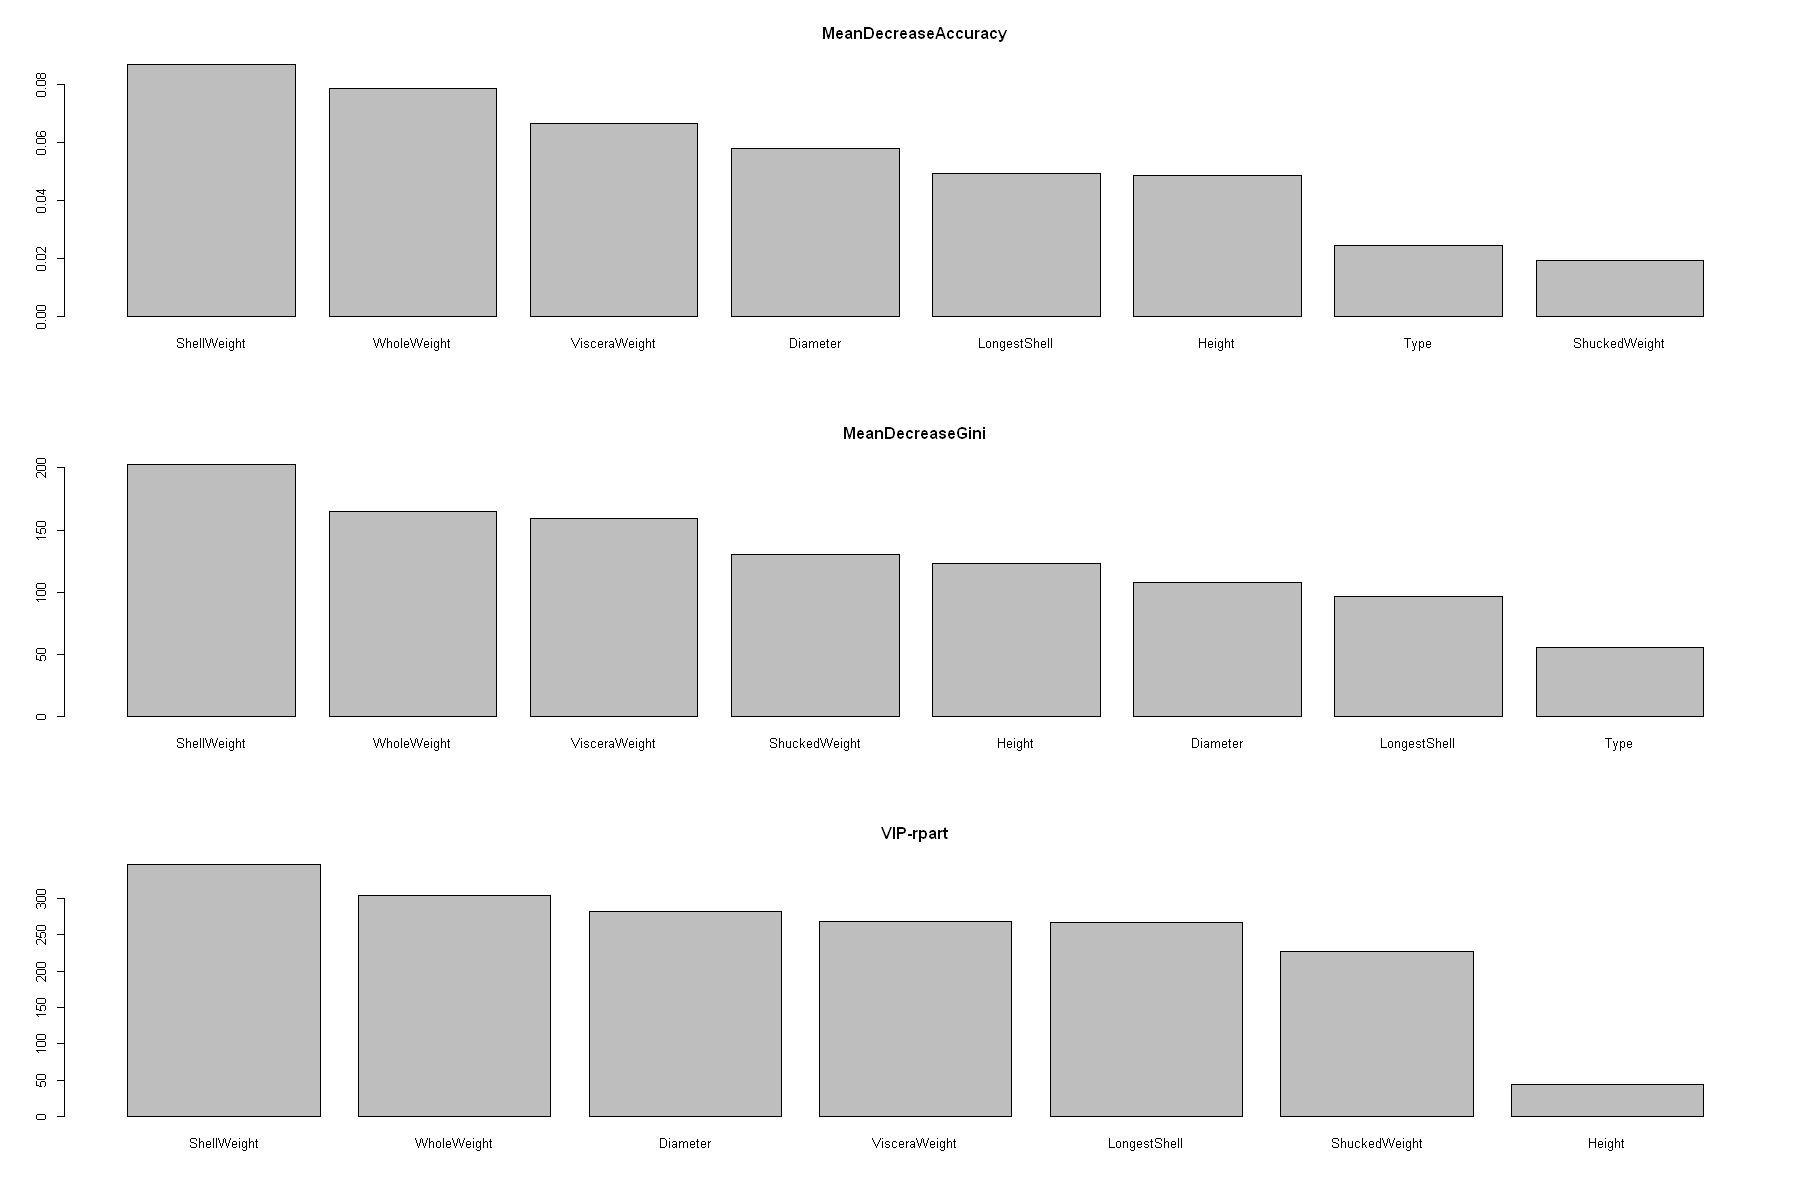

In [15]:
# 变量重要性降序排列
par(mfrow = c(3,1))
barplot(sort(vip[, "MeanDecreaseAccuracy"], decreasing = TRUE), main = "MeanDecreaseAccuracy")
barplot(sort(vip[, "MeanDecreaseGini"], decreasing = TRUE), main = "MeanDecreaseGini")
barplot(ctabo$variable.importance, main = "VIP-rpart")    #最优rpart决策树的变量重要性降序排列
#可见三者不尽相同--评价的标准不同

In [17]:
# “局部重要性”--casewise importance measure，应该是“MeanDecreaseAccuracy”？关注这个值有什么用？
rf_ab$localImportance

,3786,503,3430,3696,4090,3052,2967,470,1990,1540,⋯,2083,1553,1949,554,1113,2591,622,1191,3936,1082
Type,0.09042553,0.01086957,0.00000000,-0.01587302,0.051282051,0.00000000,0.00591716,0.00000000,0.01694915,0.00000000,⋯,0.00000000,0.09139785,0.00000000,-0.16847826,0.00000000,0.01176471,-0.158730159,-0.005235602,0.016853933,0.005154639
LongestShell,-0.01595745,0.08152174,0.04545455,0.14814815,-0.057692308,-0.05978261,0.17751479,0.10989011,0.05084746,0.01734104,⋯,0.14432990,0.09677419,0.16915423,0.05978261,0.02577320,-0.05294118,0.058201058,-0.214659686,0.078651685,0.051546392
Diameter,0.05319149,0.05434783,0.14772727,0.20105820,0.032051282,-0.03804348,0.24260355,0.15384615,0.19774011,0.01156069,⋯,0.19587629,0.06989247,0.18407960,0.03804348,0.11340206,0.08823529,0.068783069,-0.319371728,0.112359551,0.010309278
Height,0.09042553,0.04347826,0.07954545,0.13227513,0.044871795,0.05434783,-0.01183432,0.03846154,0.11299435,0.09248555,⋯,0.09278351,0.08064516,0.20398010,0.07065217,0.11340206,0.05294118,0.005291005,-0.073298429,0.033707865,0.273195876
WholeWeight,0.04787234,0.16847826,0.16477273,0.08994709,-0.006410256,-0.14673913,0.10650888,0.15384615,0.18644068,0.19075145,⋯,0.21134021,0.13978495,0.19900498,-0.06521739,0.06701031,0.05882353,0.095238095,-0.089005236,0.095505618,0.134020619
ShuckedWeight,0.20744681,0.10869565,0.01136364,-0.04761905,0.237179487,-0.03804348,-0.10059172,0.01648352,0.00000000,-0.01734104,⋯,-0.06185567,0.02150538,0.08457711,0.14130435,0.33505155,0.07058824,0.116402116,0.073298429,0.196629213,0.020618557
VisceraWeight,0.09574468,0.05978261,0.10795455,0.13756614,0.102564103,-0.07065217,0.14201183,0.15934066,0.10169492,0.10404624,⋯,0.13402062,0.23118280,0.18905473,-0.07608696,0.19072165,-0.02352941,-0.089947090,-0.026178010,-0.005617978,0.149484536
ShellWeight,0.08510638,0.22282609,0.11931818,0.16402116,0.000000000,-0.05978261,0.00000000,0.21428571,0.14124294,0.16763006,⋯,0.19072165,0.20967742,0.14427861,0.07065217,0.16494845,0.15294118,-0.068783069,-0.020942408,0.123595506,0.221649485


In [18]:
#每个树的袋外判错率
rf_ab$err.rate

OOB,L,H
0.2774275,0.2779156,0.2769231
0.2848051,0.2857143,0.2838915
0.2743590,0.2668394,0.2817259
0.2761959,0.2614155,0.2909091
0.2731183,0.2693133,0.2769397
0.2641316,0.2638037,0.2644628
0.2555221,0.2605210,0.2505030
0.2521008,0.2512315,0.2529762
0.2552465,0.2487805,0.2617188
0.2448980,0.2374031,0.2524366


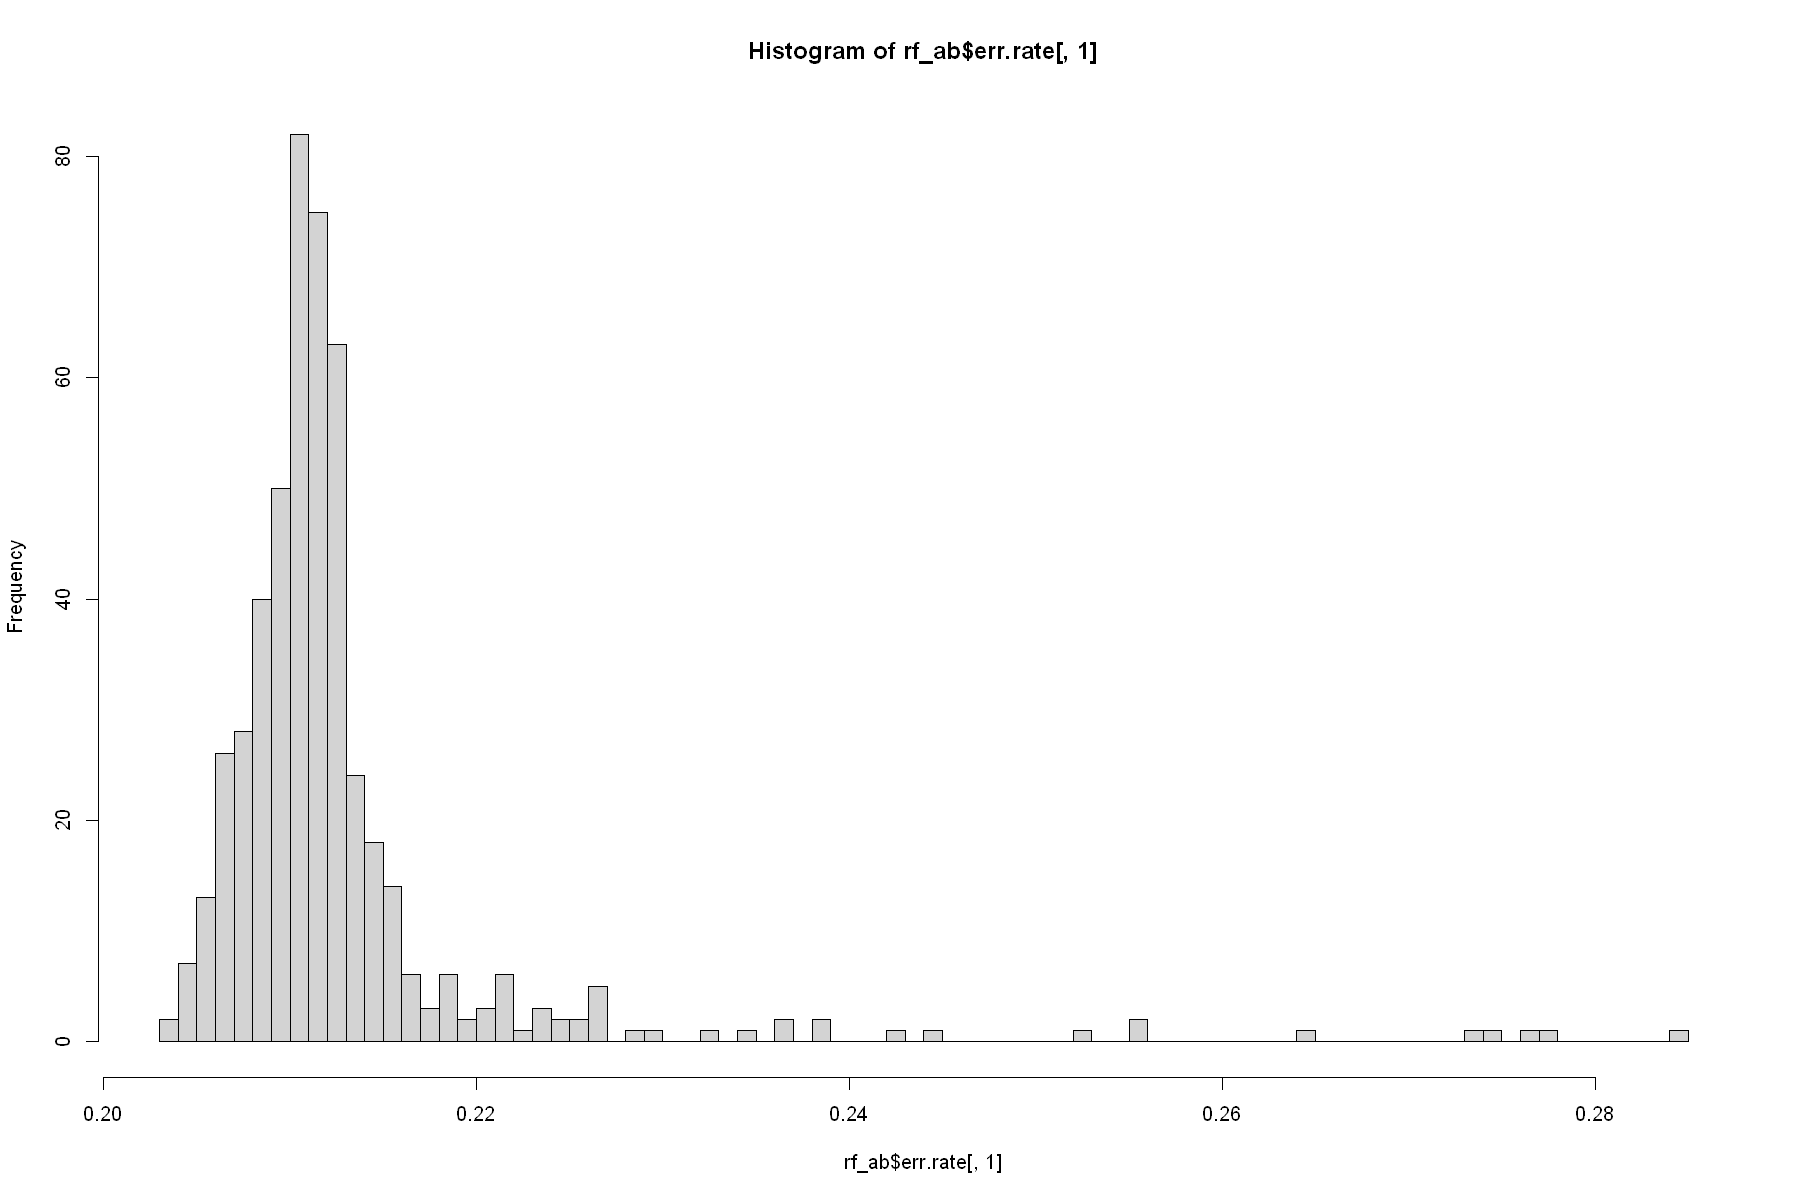

In [19]:
#每个树的袋外判错率的直方图
hist(rf_ab$err.rate[,1],100) 

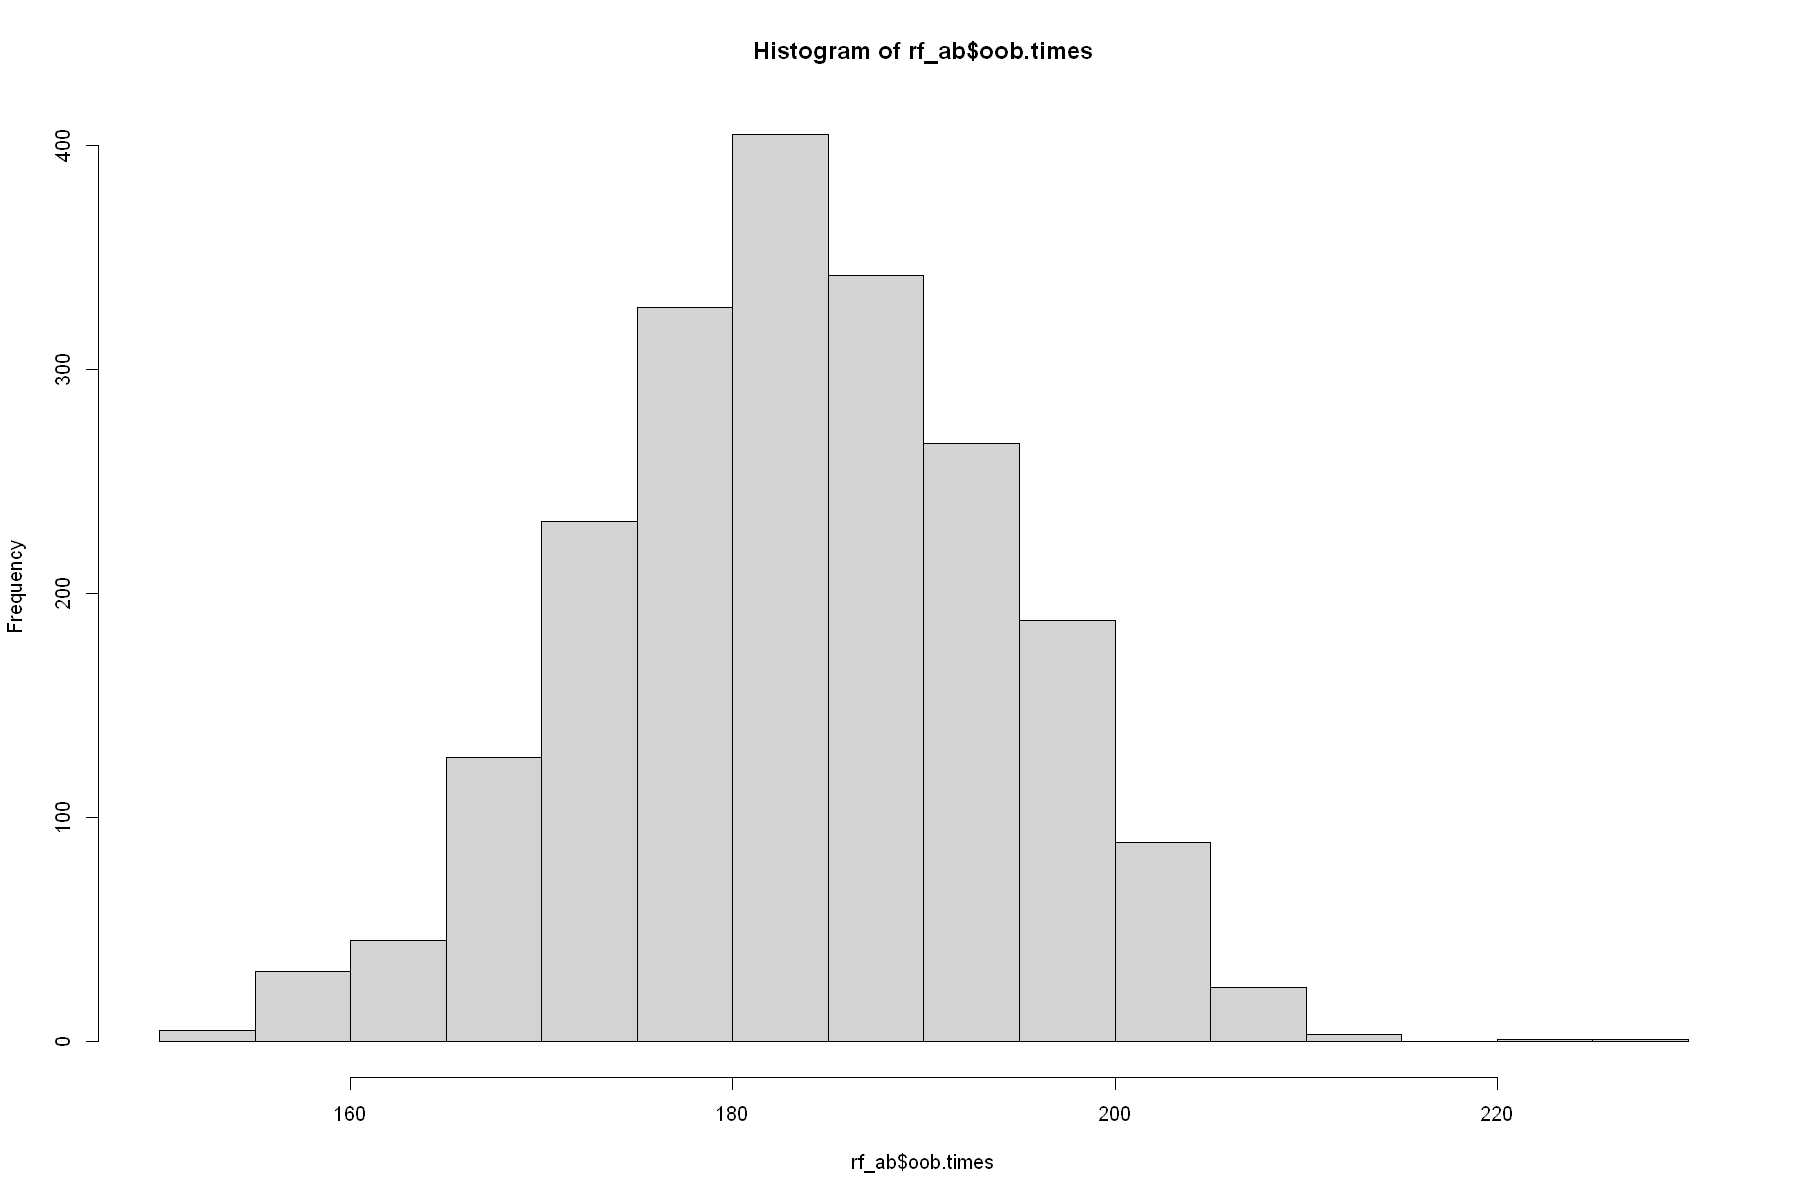

In [20]:
#每个样例处于OOB的次数
hist(rf_ab$oob.times) 

In [20]:
#训练集的预测值
rf_ab$predicted

3786  503 3430 3696 4090 3052 2967  470 1990 1540  823 2886 2347 2514 2956 3043 1331  456 3218 1817 3507  948 3632  288  347 1808 4169  605 
   L    H    L    H    L    H    H    H    L    L    L    L    H    H    H    L    H    H    L    H    L    L    L    H    H    H    H    H 
3742 1631  223 1449 3369 2441 2411 1624 2931 2478 3326 2095 2060  947 1145   16 1976 1430  949 2691 3925  757 2329 3727 2469 2714 1420 1161 
   H    H    H    L    H    L    L    H    H    H    H    L    L    L    L    H    H    L    L    H    H    H    H    H    L    L    H    H 
1867 3386 1061 2779  328 3163 1218 2195 2842 1285  334 3368  879 2897 2496 1247 2384 2470 1752  723 4081 2762 2828 1837 2538 1988 3172 3273 
   L    L    L    L    H    H    L    L    H    H    L    H    H    L    H    L    H    H    H    H    L    L    L    L    H    L    H    H 
3994 2331 3999 2990 3143 1685 3623 4073  988 1729 2320 3154 3720 2442 3781 2519 4149 1234 2529  711  458  177 3300 3202  651 3054 4138  114 
   H    L    L    L    L    H    H    L    L    H    H    L    L    H    H    L    H    L    H    L    L    L    H    L    L    H    H    L 
2049 4100 2848  457 1149 3705 1293 2366  395  100 2490  910 1274 2218  916  576 3791 3087 3348 3762 2176 3821 1583 3255  402  894  614 1497 
   L    H    L    H    L    H    L    H    L    L    L    L    L    H    L    H    H    L    L    L    H    H    L    L    H    L    L    H 
2101 1876 2571 1229 1942 1623 2356 2688 4007 1951 3406 1253  972 3886 2009 2277  448  492 3579 2707 1675 1996  660 2890  302 2386  668 1552 
   L    H    L    L    L    H    H    H    L    H    L    L    L    L    L    H    H    H    H    H    H    L    H    L    H    L    H    L 
2373 1159 3025 3768  165 3444 3319 2888 3047 3018 3333  852 1900 1491 1070  116 3604 3794  824 2497  804  506  806 1208 1579 3467  573 2451 
   L    L    L    H    H    L    L    L    H    L    H    L    L    H    L    L    L    H    L    H    L    H    L    H    L    H    H    L 
 630 3498 2574 2431 1850  878 3587 3627 2524 3464 1978 2380 4015 3639  209 1139 3865 1515 4155 2730 2352 4087 1244 1920  703 1543 3625 3582 
   L    L    L    L    H    H    H    H    L    H    H    L    H    L    H    L    L    H    L    L    L    L    L    H    L    L    H    H 
3835 2399 1043 4072 2402  945 4070 1661 4164 3766   56 1164 1407 3364  905 3201   87 1135  397 1719 2859 4145 1351 2667   76 1349 3013  981 
   L    L    H    L    H    L    L    L    L    H    H    L    H    L    L    H    H    L    L    H    H    H    L    L    H    H    L    L 
2621 2768 1485 3296 3110 1398 2952 3757 2285 2146 3235 3789 3293  903 2946 1639  695 1257 1663 2872  585 1199  904  923 1052 1036 2155 1021 
   H    L    L    L    L    H    H    L    L    H    H    H    H    L    H    H    L    L    L    L    L    H    L    L    H    H    H    H 
1703  644 1143 1835 1320  752 2194 1649 1383 1242  324  401  120  755  909 3427 2000 3095  737 4158 3157    2 3478 3931  568 2316 2177 1106 
   H    L    L    L    L    L    L    H    H    L    L    L    L    H    L    H    L    H    H    H    H    L    L    H    L    H    H    L 
1869  946 2437 3496 2008 1727   83 1313  340 1513 1154  735 4110 1918  656 3712 2414 1971 1045 3699 3706 2450 2733 2295 1038 1633 2605  133 
   L    L    H    L    L    H    H    H    H    H    L    H    L    H    L    H    H    H    H    H    H    L    L    L    H    H    H    L 
3443 3472 1394  697 3098 4005 2689 2235 3394  997 1198 3304 1941 3421 3269 4031  592 1617 2644 3004 2079 2801 2934  488 2729 3588  262 3581 
   L    H    H    L    H    L    L    H    H    L    H    H    H    H    L    L    L    L    L    H    H    H    H    H    L    H    H    H 
3151 3881  898 2336 1896 3349 3770  213 2677 2061 1297 3353 1100 1327 3402 3690 3539  849  537 1307 3035 1162 2746 1141 1350  248 4077 3719 
   H    L    L    H    H    L    L    H    H    L    L    H    L    H    H    H    L    H    L    L    H    L    L    H    H    L    H    L 
3916 3648 3668 1784 4115  214 1495 1447 1498  783   

In [11]:
rf_ab$proximity   #出现在同一叶节点的比率--可以用以衡量样例间的相似性

,3786,503,3430,3696,4090,3052,2967,470,1990,1540,⋯,2083,1553,1949,554,1113,2591,622,1191,3936,1082
3786,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.08045977,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
503,0.00000000,1.00000000,0.00000000,0.03947368,0.00000000,0.00000000,0.00000000,0.01282051,0.00000000,0.00000000,⋯,0.01562500,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
3430,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.09836066,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
3696,0.00000000,0.03947368,0.00000000,1.00000000,0.00000000,0.00000000,0.08333333,0.25714286,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.10000000,0.00000000,0.00000000,0.00000000,0.00000000,0.02985075,0.00000000,0.00000000
4090,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.01449275,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
3052,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.01562500,0.00000000,0.00000000,0.00000000,0.00000000
2967,0.00000000,0.00000000,0.00000000,0.08333333,0.00000000,0.00000000,1.00000000,0.10000000,0.00000000,0.00000000,⋯,0.03174603,0.00000000,0.06060606,0.00000000,0.00000000,0.00000000,0.00000000,0.28985507,0.00000000,0.00000000
470,0.00000000,0.01282051,0.00000000,0.25714286,0.00000000,0.00000000,0.10000000,1.00000000,0.00000000,0.00000000,⋯,0.09090909,0.00000000,0.03614458,0.00000000,0.00000000,0.00000000,0.00000000,0.01492537,0.00000000,0.00000000
1990,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.07462687,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1540,0.00000000,0.00000000,0.09836066,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.07462687,1.00000000,⋯,0.00000000,0.06153846,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


### 分类：非平衡、代价敏感、无缺失值

数据集friedman1:The friedman1 benchmark problem uses simulated regression data with 7 input features according to:$Y=10\sin(\pi X_1X_2)+20(X_3-0.5)^2+10X_4+5X_5+\epsilon$ , where $\epsilon\sim N(0,\sigma)$  and the input features are all independent uniform random
variables on the interval $[0,1]$: $\{X_j\}^{7}_ {j=1}\overset{iid}{\sim} U(0,1)$, Notice how $X_6 \sim X_{10} $ are unrelated to the response $Y$ .


将该数据集改造成"L"、"H"二类数量悬殊的非平衡数据集

In [1]:
library(pacman)

options(warn = -1) # 忽略一切警告
options("width" = 140) # 充分利用打印宽度
options(repr.plot.width = 15, repr.plot.height = 10) # 满幅

p_load(rpart)
library(randomForest)
p_load(skimr)
s <- skim_tee

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



**生成数据**

In [2]:
#训练集
set.seed(943) # for reproducibility
tr_fr <- treemisc::gen_friedman1(100000, nx = 10, sigma = 0.1)
tr_fr$y <- factor(ifelse(tr_fr$y < quantile(tr_fr$y,0.9), "L", "H"))
s(tr_fr)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             100000
Number of columns          11    
_______________________          
Column type frequency:           
  factor                   1     
  numeric                  10    
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts        
1 y                     0             1 FALSE          2 L: 90000, H: 10000

── Variable type: numeric ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   skim_variable n_missing complete_rate  mean    sd          p0   p25   p50   p75 p100 hist 
 1 x1                    0             1 0.499 0.288 0.00000299  0.248 0.497 0.749 1.00 ▇

In [3]:
#测试集
set.seed(955) # for reproducibility
te_fr <- treemisc::gen_friedman1(100000, nx = 10, sigma = 0.1)
te_fr$y <- factor(ifelse(te_fr$y < quantile(te_fr$y,0.9),"L", "H"))
s(te_fr)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             100000
Number of columns          11    
_______________________          
Column type frequency:           
  factor                   1     
  numeric                  10    
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts        
1 y                     0             1 FALSE          2 L: 90000, H: 10000

── Variable type: numeric ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   skim_variable n_missing complete_rate  mean    sd         p0   p25   p50   p75 p100 hist 
 1 x1                    0             1 0.501 0.289 0.00000308 0.253 0.502 0.751 1.00 ▇▇▇

假定将L类判为H类的代价为1，H类判为L类的代价为9

**不采用非平衡方面的处置**


Call:
 randomForest(formula = y ~ ., data = tr_fr, ntree = 501) 
               Type of random forest: classification
                     Number of trees: 501
No. of variables tried at each split: 3

        OOB estimate of  error rate: 2.43%
Confusion matrix:
     H     L class.error
H 8270  1730 0.173000000
L  704 89296 0.007822222

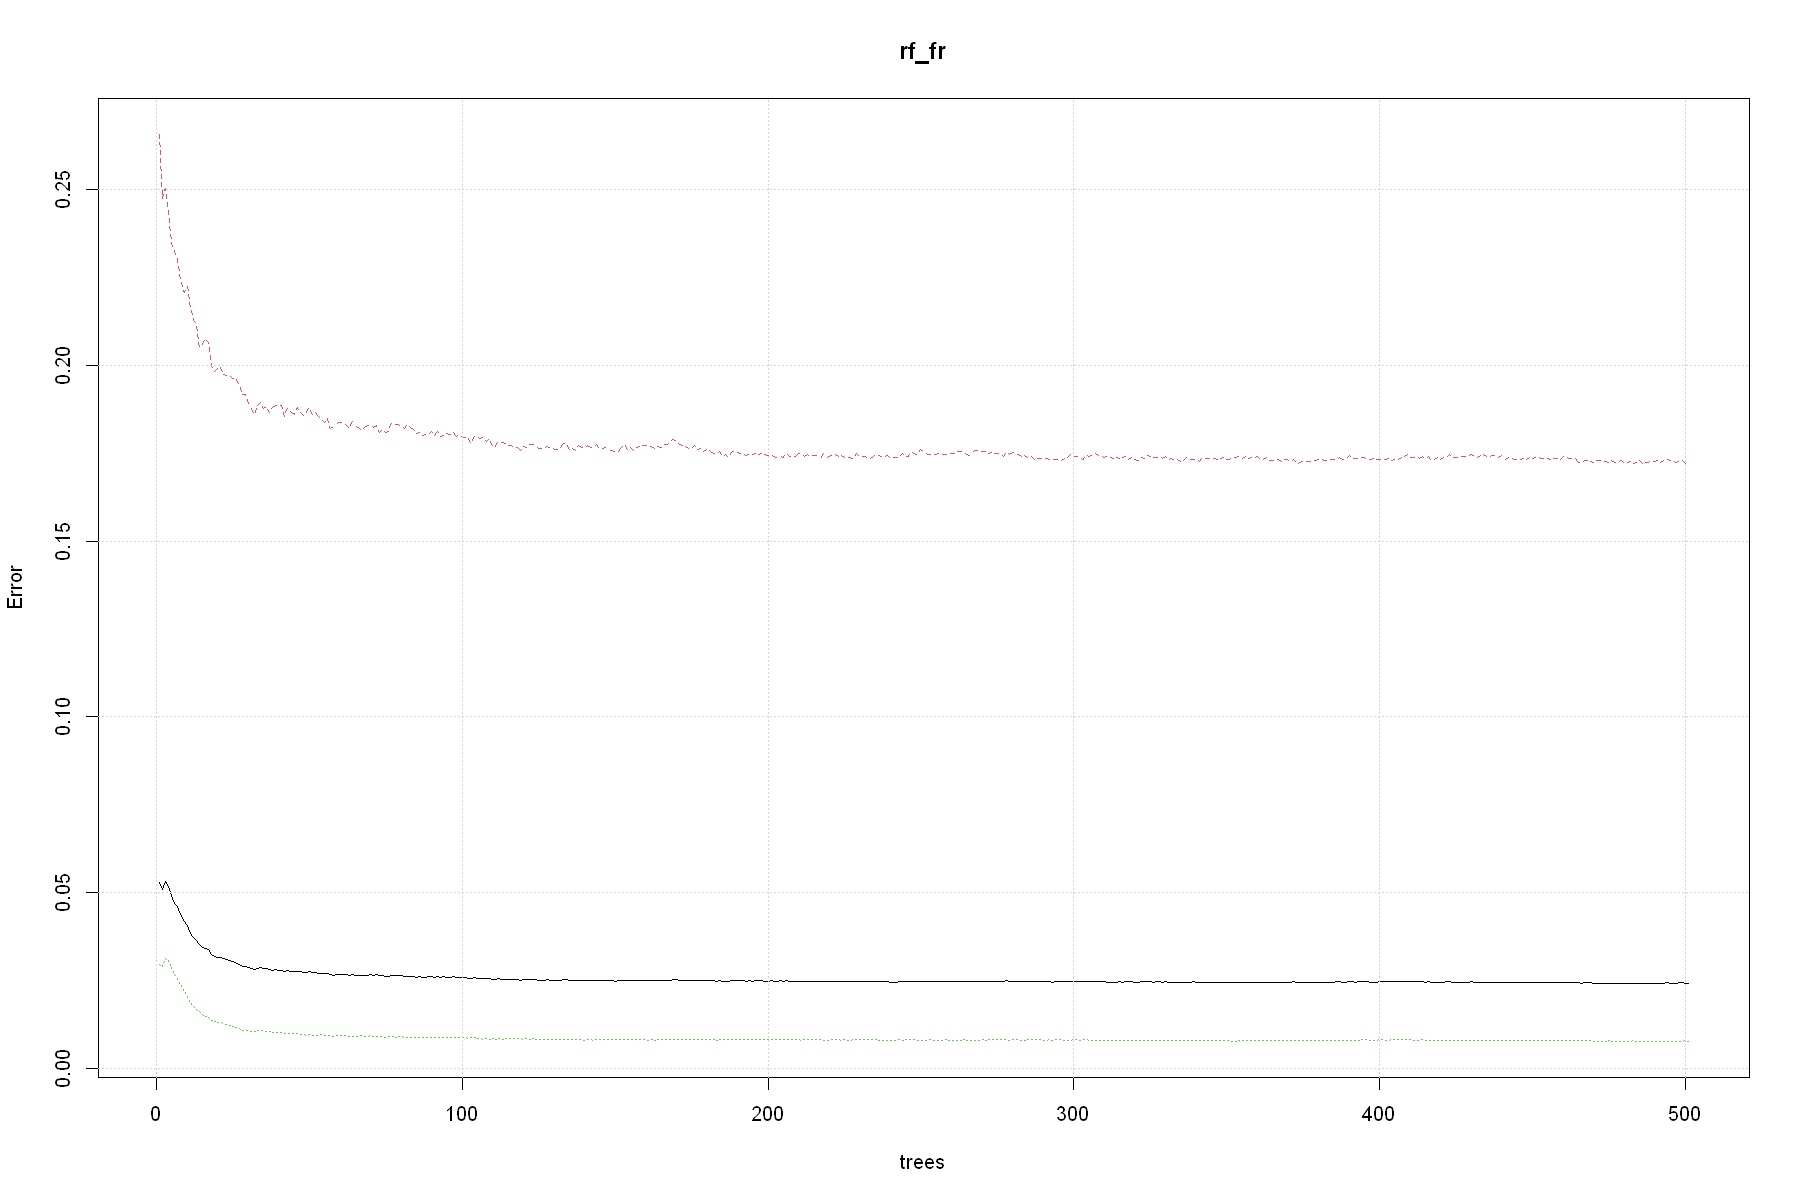

In [5]:
set.seed(71)
(rf_fr <- randomForest(y ~ ., data = tr_fr, ntree = 501))
plot(rf_fr)
grid()

In [6]:
#测试集总损失
sum((te_fr$y == "L") & (predict(rf_fr, te_fr) == "H")) * 1 + sum((te_fr$y == "H") & (predict(rf_fr, te_fr) == "L")) * 9

[1] 17013

#### 内部参数法

--不改变外部训练数据，从训练算法入手


Call:
 randomForest(formula = y ~ ., data = tr_fr, weights = w, ntree = 501) 
               Type of random forest: classification
                     Number of trees: 501
No. of variables tried at each split: 3

        OOB estimate of  error rate: 3.17%
Confusion matrix:
     H     L class.error
H 8331  1326   0.1373097
L 1836 88164   0.0204000

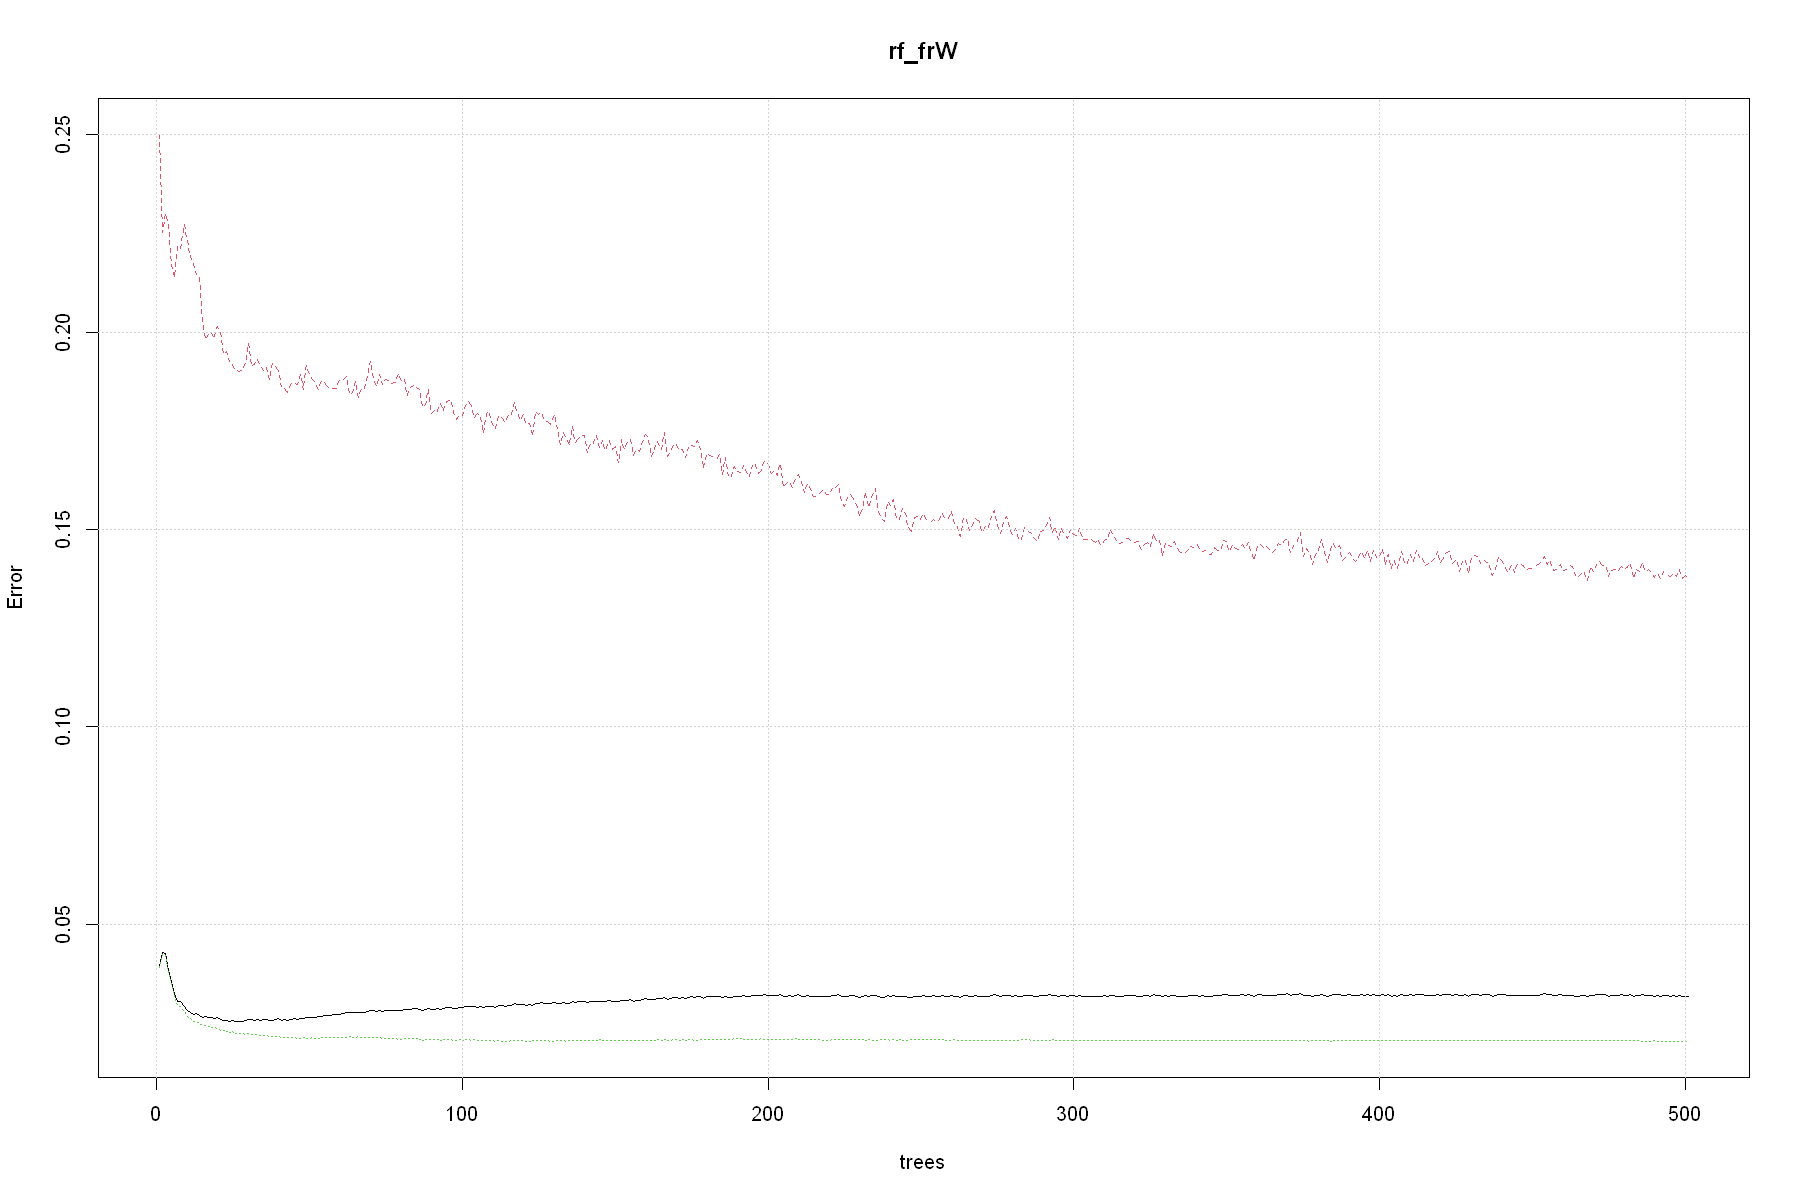

In [19]:
w <- ((tr_fr$y == "L") * 1 + (tr_fr$y == "H") * 9)    #H类样例的抽样概率是L类的9倍

set.seed(71)
(rf_frW <- randomForest(y ~ ., data = tr_fr, weights = w, ntree = 501))
plot(rf_frW)
grid()

In [20]:
#随机森林rf_frW的测试集总损失
sum((te_fr$y == "L") & (predict(rf_frW, te_fr) == "H")) * 1 + 
sum((te_fr$y == "H") & (predict(rf_frW, te_fr) == "L")) * 9

[1] 9865

In [9]:
#采用“内部参数法”的rpart最优决策树的性能
lm <- matrix(c(0,9,1,0), byrow = TRUE, nrow = 2) #L类判为H类的代价为1，H类判为L类的代价为9
ct_fr1o <- rpart(y ~ ., data = tr_fr, parms = list(loss = lm), cp = 0.026)  #参见https://github.com/A-Pai/rpart-solveing/blob/main/1-rpart.ipynb
#ct_fr1o最优决策树测试集总损失
sum((te_fr$y == "L") * (predict(ct_fr1o, te_fr, type = "class") == "H")) * 1 + 
sum((te_fr$y == "H") * (predict(ct_fr1o, te_fr, type = "class") == "L")) * 9

[1] 26860

二者比较，随机森林的泛化性能更优，但耗时较长。

#### 数据扩充法

--按照代价(L类判为H类的代价为1，H类判为L类的代价为9)扩充数据，因此将H类扩充到原来的9倍。

In [6]:
#将1类扩充到原来的5倍--1类判错的代价是0类的3倍
id <- tr_fr$y == "H"

tr_frE <- tr_fr
for(i in 1:8){
    tr_frE <- rbind(tr_frE,tr_fr[id,])
}
set.seed(111)
tr_frE <- tr_frE[sample(nrow(tr_frE)),]  #乱序

table(tr_frE$y)  #训练集扩充后的构成


    H     L 
90000 90000 


Call:
 randomForest(formula = y ~ ., data = tr_frE, ntree = 501) 
               Type of random forest: classification
                     Number of trees: 501
No. of variables tried at each split: 3

        OOB estimate of  error rate: 0.69%
Confusion matrix:
      H     L class.error
H 90000     0  0.00000000
L  1245 88755  0.01383333

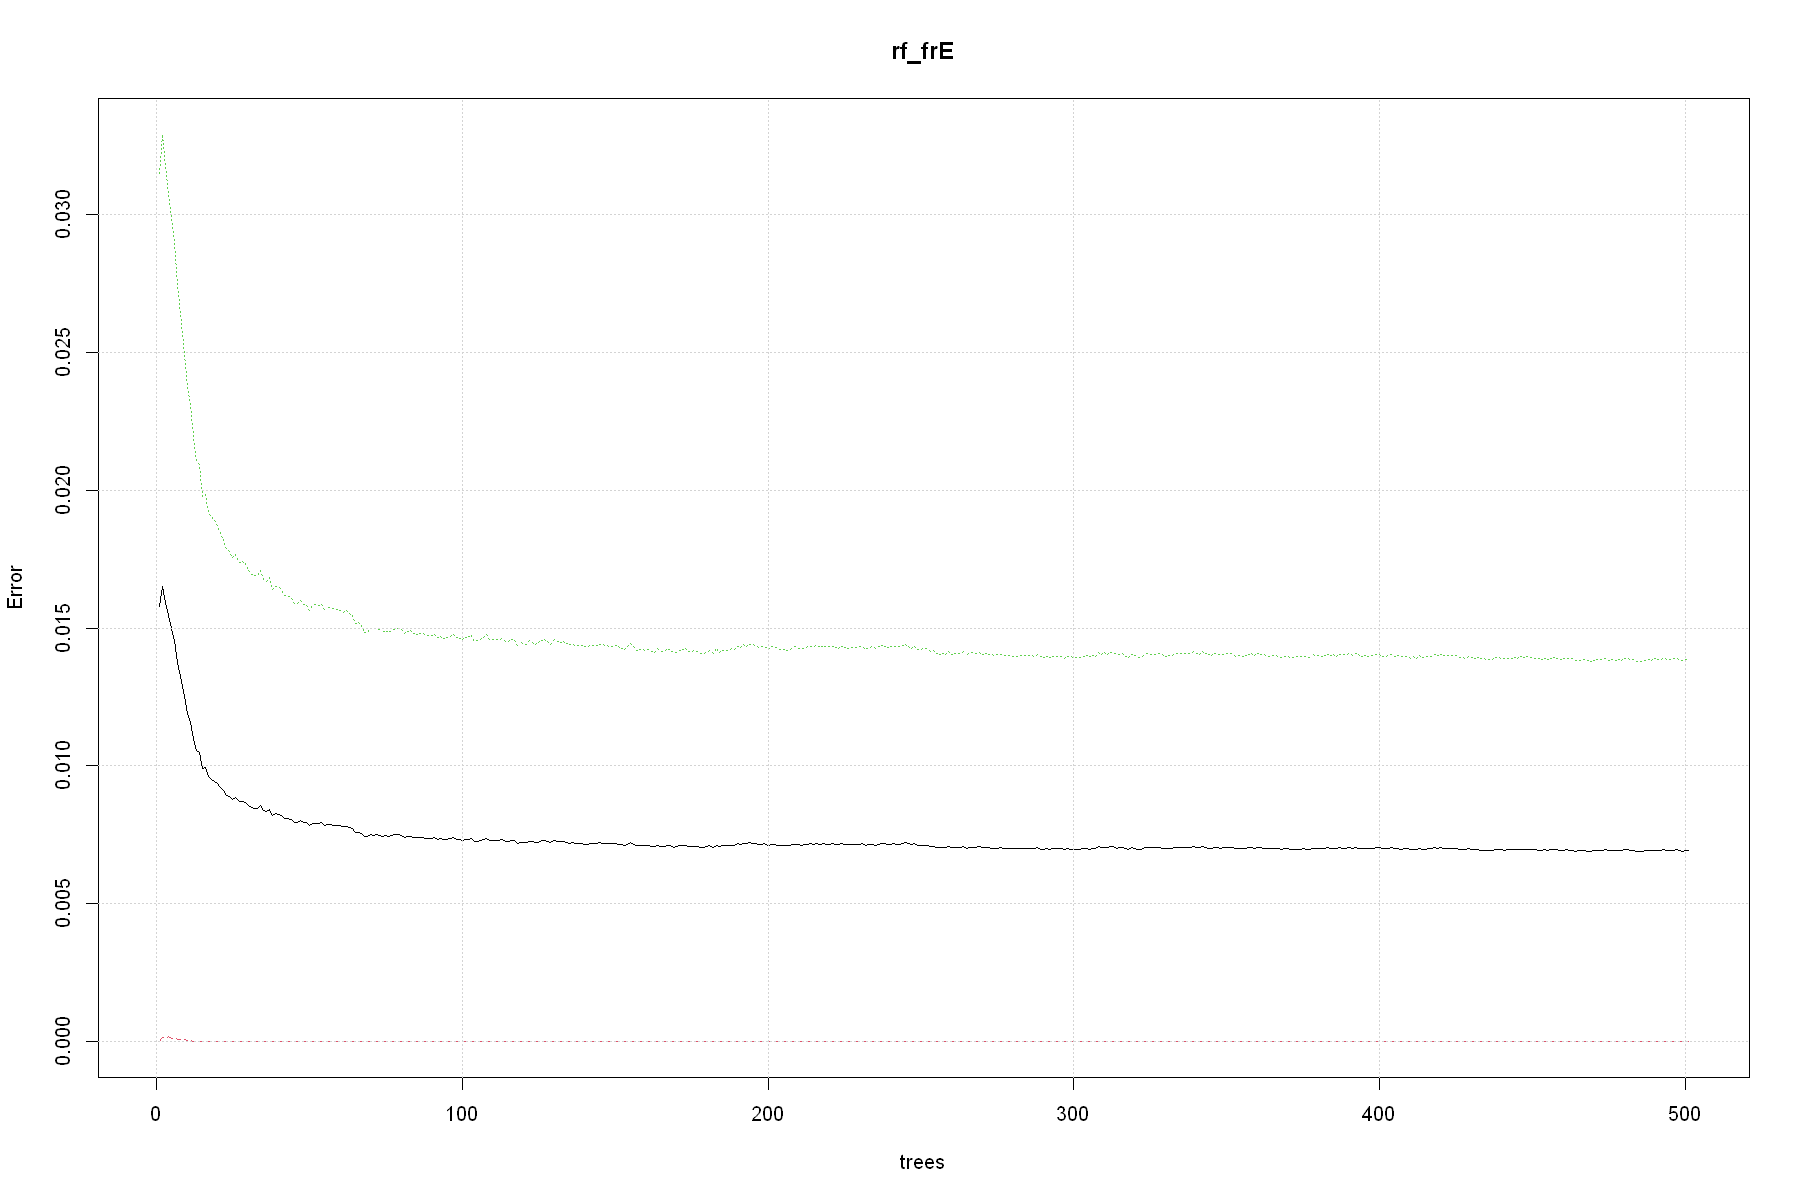

In [11]:
set.seed(71)
(rf_frE <-randomForest(y ~ ., data = tr_frE, ntree = 501)) 
plot(rf_frE)
grid()

In [12]:
#随机森林rf_frE的测试集总损失
sum((te_fr$y == "L") & (predict(rf_frE, te_fr) == "H")) * 1 + 
sum((te_fr$y == "H") & (predict(rf_frE, te_fr) == "L")) * 9

[1] 12658

In [7]:
#决策树ct_fr2o的测试集总损失
ct_fr2o <- rpart(y ~ ., data = tr_frE,  cp = 0.026)
sum((te_fr$y == "L") * (predict(ct_fr2o, te_fr, type = "class") == "H")) * 1 + 
sum((te_fr$y == "H") * (predict(ct_fr2o, te_fr, type = "class") == "L")) * 9

[1] 26860

二者比较，随机森林的泛化性能更优，但耗时较长。

**思考：内部参数法与数据扩充法性能差异较大，为何？**

### 回归：无缺失值、特征连续取值


The Friedman 1 benchmark problem uses simulated regression data with 7 input features according to:$Y=10\sin(\pi X_1X_2)+20(X_3-0.5)^2+10X_4+5X_5+\epsilon$ , where $\epsilon\sim N(0,\sigma)$  and the input features are all independent uniform random
variables on the interval $[0,1]$: $\{X_j\}^{7}_ {j=1}\overset{iid}{\sim} U(0,1)$, Notice how $X_6 \sim X_7 $ are unrelated to the response $Y$ .

请注意$X_6 $、$ X_7 $独立于因变量$Y$，方便检验算法判断自变量重要性。

In [1]:
library(pacman)

options(warn = -1) # 忽略一切警告
options("width" = 140) # 充分利用打印宽度
options(repr.plot.width = 15, repr.plot.height = 10) # 满幅

p_load(rpart)
p_load(randomForest)
p_load(skimr)
s <- skim_tee

In [2]:
set.seed(943) # for reproducibility
fr <- treemisc::gen_friedman1(1000, nx = 7, sigma = 0.1)
s(fr)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             1000  
Number of columns          8     
_______________________          
Column type frequency:           
  numeric                  8     
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   mean    sd        p0    p25    p50    p75   p100 hist 
1 y                     0             1 14.1   4.88  1.65      10.7   14.1   17.5   27.5   ▂▅▇▅▁
2 x1                    0             1  0.505 0.294 0.00129    0.238  0.511  0.769  1.00  ▇▇▇▇▇
3 x2                    0             1  0.492 0.292 0.00134    0.231  0.499  0.749  0.999 ▇▇▇▇▇
4 x3                    0             1  0.490 0.285 0.000113   0.242  0.482  0.740  0.999 ▇▇▇▇▇
5 x4                    0 

In [3]:
#将数据集1:1随机分割成训练集和测试集
set.seed(100)
I <- sample(nrow(fr),nrow(fr)*0.5)
train_fr <- fr[I,]
test_fr <- fr[-I,]
s(train_fr)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             500   
Number of columns          8     
_______________________          
Column type frequency:           
  numeric                  8     
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   mean    sd        p0    p25    p50    p75   p100 hist 
1 y                     0             1 14.0   5.09  1.97      10.7   14.0   17.5   27.2   ▂▅▇▆▁
2 x1                    0             1  0.506 0.290 0.00166    0.251  0.507  0.768  0.996 ▇▇▇▇▇
3 x2                    0             1  0.481 0.296 0.00473    0.206  0.477  0.747  0.994 ▇▆▆▆▆
4 x3                    0             1  0.498 0.274 0.000852   0.272  0.489  0.728  0.999 ▆▇▇▇▆
5 x4                    0 


Call:
 randomForest(formula = y ~ ., data = train_fr, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 3.488086
                    % Var explained: 86.52

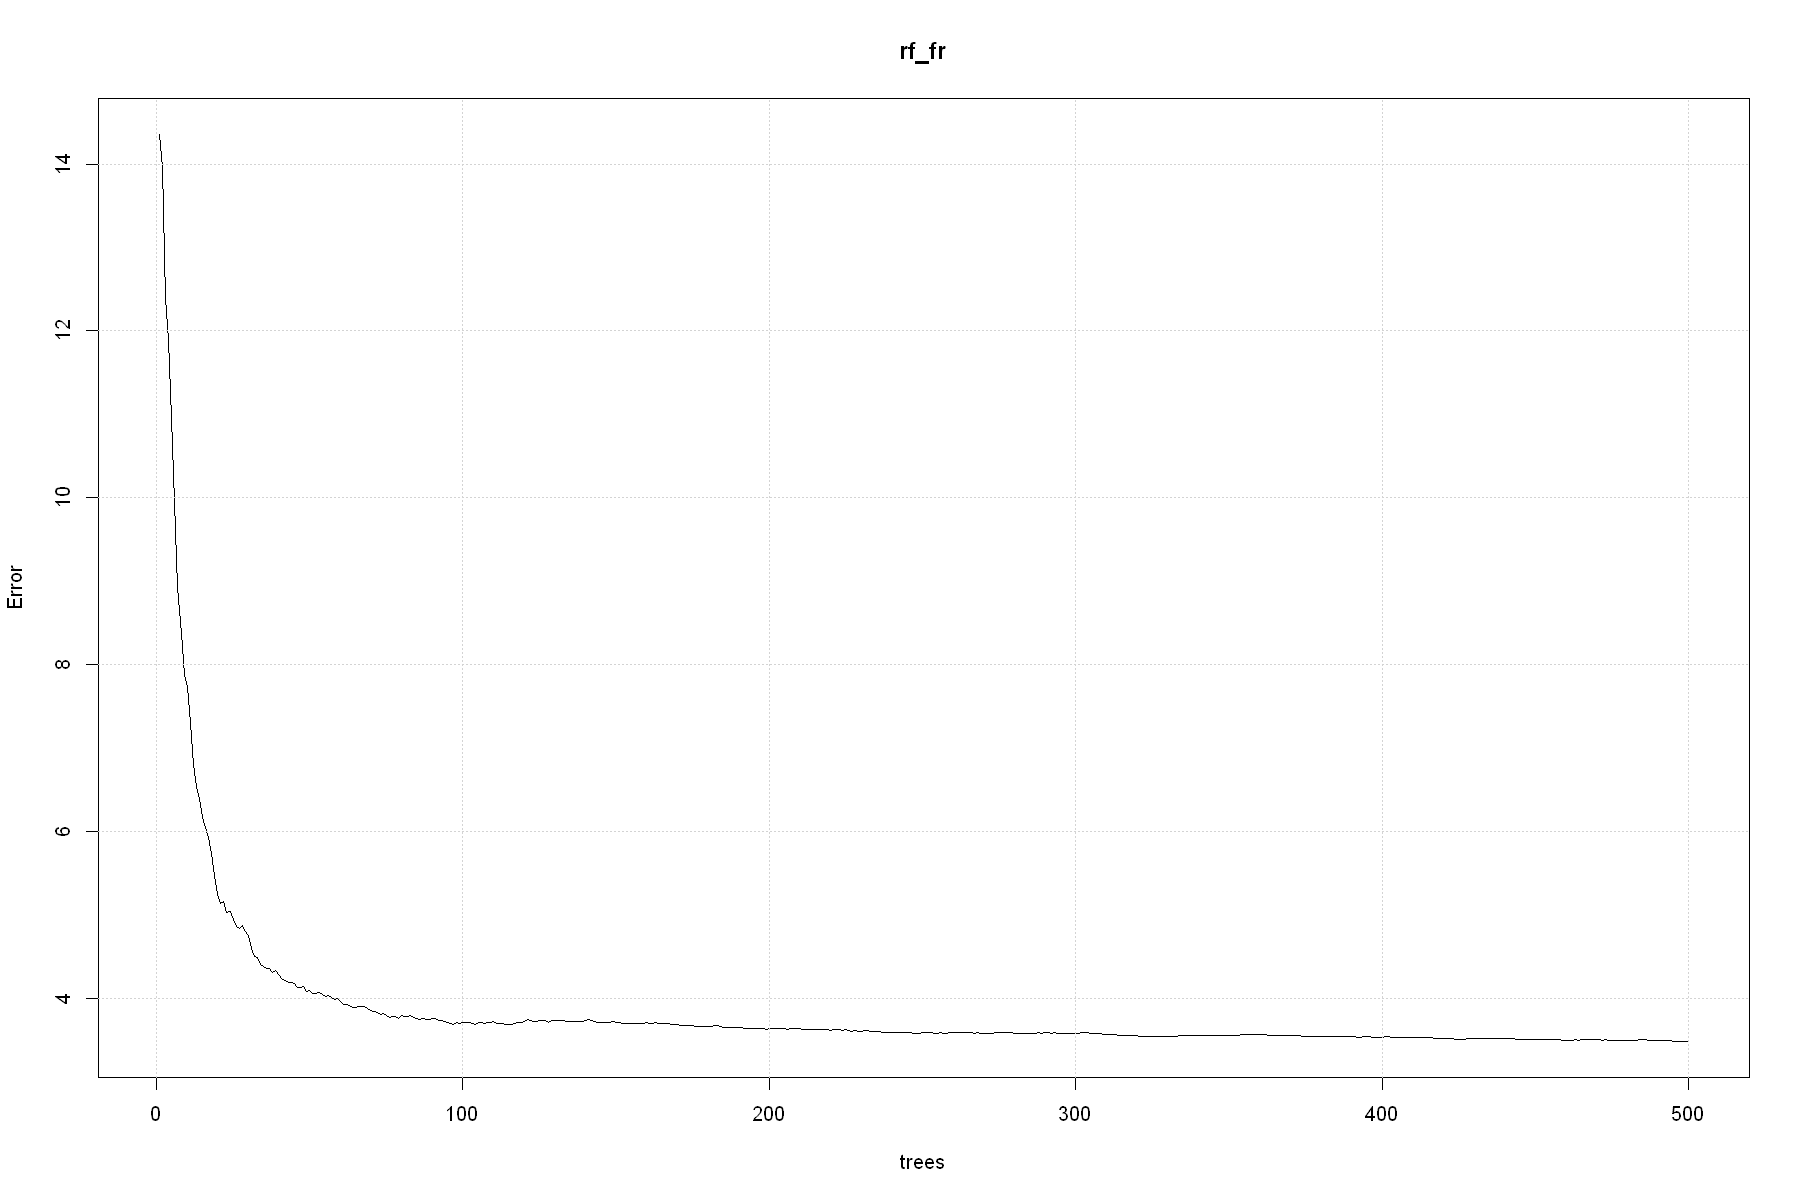

In [8]:
set.seed(71)
(rf_fr <- randomForest(y ~ ., data = train_fr, importance = TRUE)) 
plot(rf_fr)
grid()

In [11]:
#随机森林的泛化性能
(MSE_test_f <- mean((predict(rf_fr, test_fr)  - test_fr$y)^2))    #测试集的MSE

#根据1-SE原则，最优cp=0.0032,参见https://github.com/A-Pai/rpart-solveing/blob/main/1-rpart.ipynb
rtfro <- rpart(y ~ .,data = train_fr, cp = 0.0032)
#rpart决策树的泛化性能
(MSE_test <- mean((predict(rtfro, test_fr)   - test_fr$y)^2))    #测试集的MSE  

#二者比较，可见随机森林的泛化性能优于决策树

[1] 3.424967

[1] 7.363467

In [10]:
# 特征的重要性均值:
(vip <- rf_fr$importance)

,%IncMSE,IncNodePurity
x1,7.29291992,2404.4801
x2,8.71027159,2624.6632
x3,1.89148567,1110.4659
x4,13.38294569,3883.4248
x5,3.64010042,1583.0506
x6,0.05878773,495.5489
x7,0.09911403,476.2747


%IncMSE计算：
1. grow regression forest. Compute OOB-mse, name this mse0.
1. for 1 to j var: permute values of column j, then predict and compute OOB-mse(j)
1. %IncMSE of j'th is (mse(j)-mse0)/mse0 * 100%

IncNodePurity计算：

IncNodePurity (Increase in Node Purity) expresses the change in the homogeneity of the of the groups created by the trees ,for regression, it is measured by residual sum of squares.

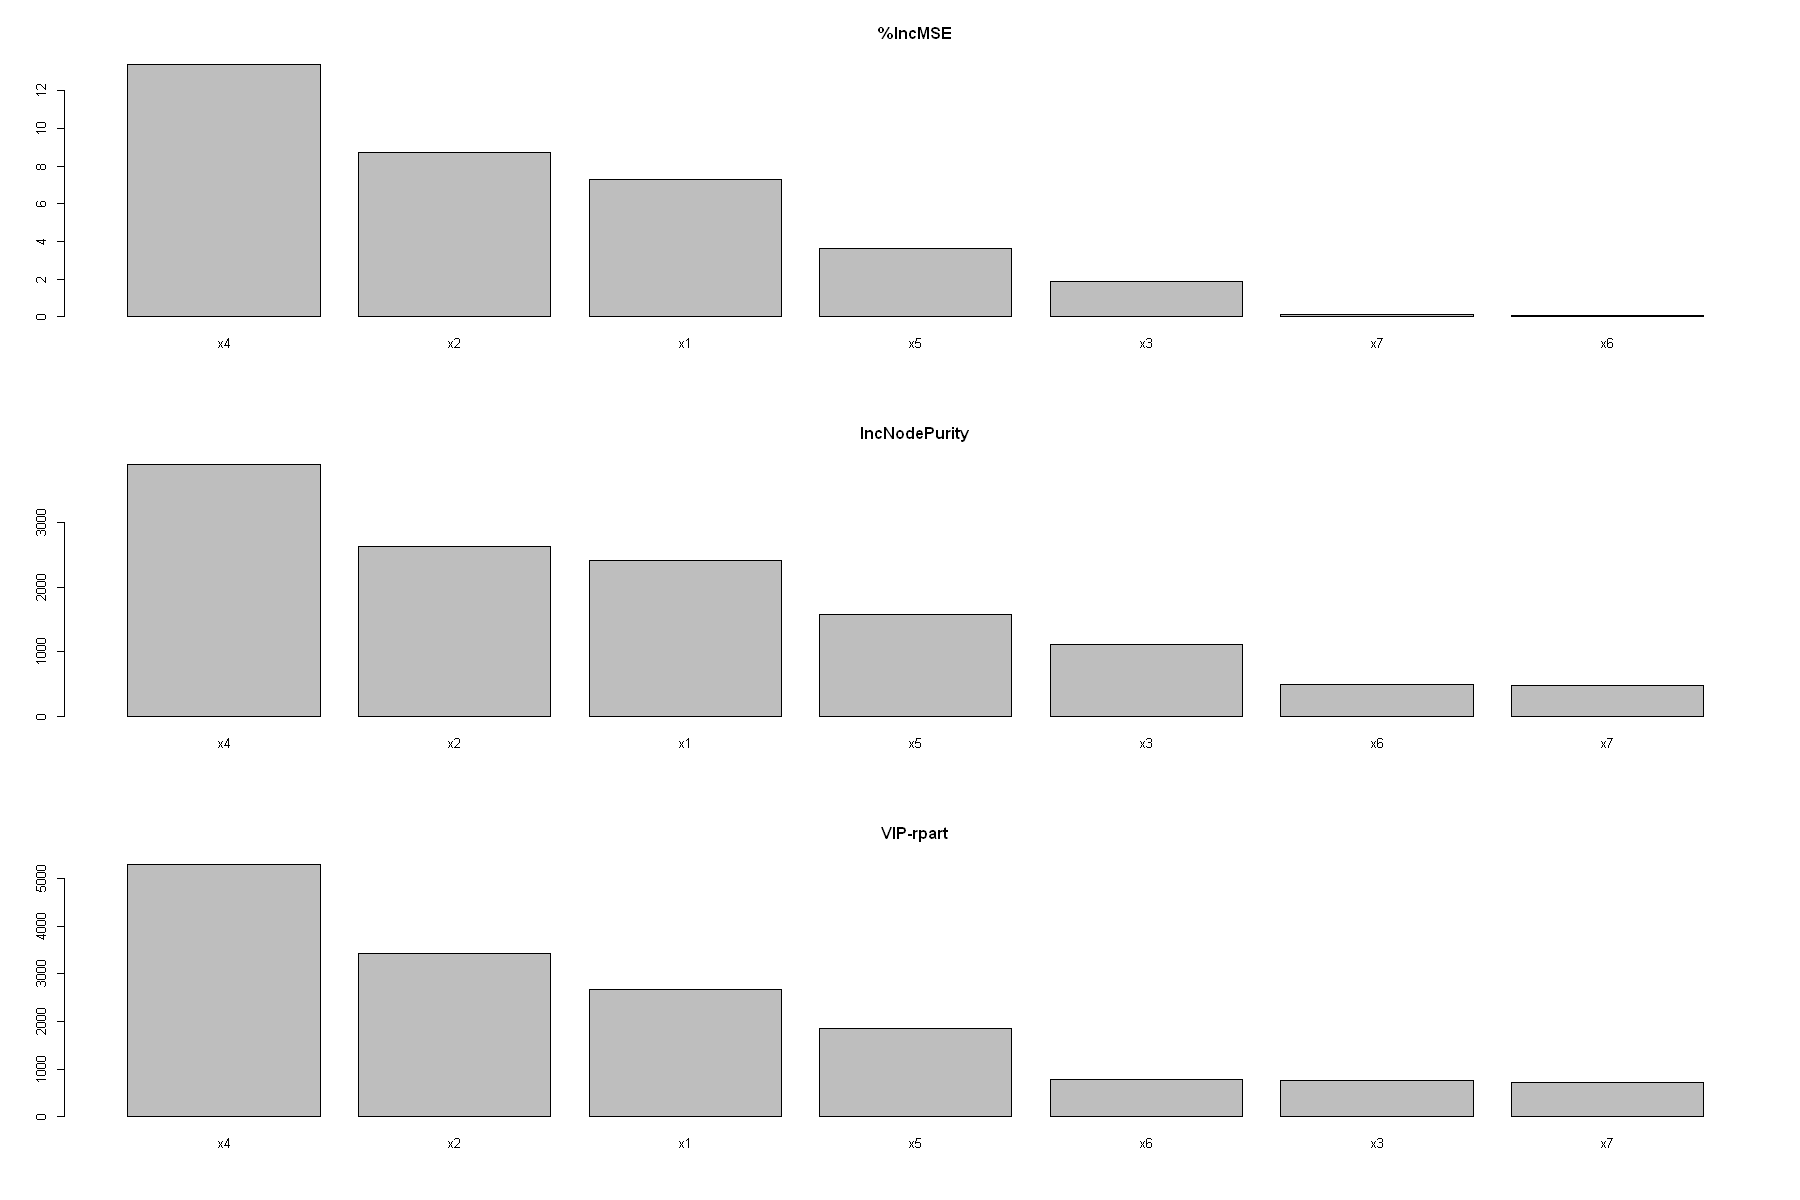

In [11]:
# 变量重要性降序排列
par(mfrow = c(3,1))
barplot(sort(vip[, "%IncMSE"], decreasing = TRUE), main = "%IncMSE")
barplot(sort(vip[, "IncNodePurity"], decreasing = TRUE), main = "IncNodePurity")
barplot(rtfro$variable.importance, main = "VIP-rpart")    #最优rpart决策树的变量重要性降序排列
#可见三者不尽相同，但随机森林的二种评价方式都将x6、x7排在了重要性的末尾，raprt未能将x6、x7排在重要性的末尾

In [20]:
# 针对于各个样例的“局部重要性”
rf_ab$localImportance

,3786,503,3430,3696,4090,3052,2967,470,1990,1540,⋯,2083,1553,1949,554,1113,2591,622,1191,3936,1082
Type,-0.07187858,0.3032001,0.07500607,0.557002762,-0.2137477,-1.6347729,2.0999156,-0.76836141,0.0321250,0.3488167,⋯,2.0339001,1.1987431,0.9064421,-3.1918556,1.975631,0.06910394,-8.52009749,0.80804948,0.40788510,1.9758776
LongestShell,4.41835195,0.4855173,5.18989375,3.264139042,-0.5910075,4.6945425,3.8261737,4.77792701,4.7461753,2.8844664,⋯,11.1525251,2.7662607,3.2538954,0.6541619,-1.842591,4.47500000,0.97235844,6.97130085,-5.26758996,0.3550336
Diameter,1.87681558,2.4281548,5.92736946,0.068239718,1.3140405,1.0115703,0.9593981,14.54289450,5.3440433,4.1747944,⋯,1.4355165,2.3601489,-2.8904441,0.6042254,4.602286,6.08751195,1.49596955,-0.01756831,-0.73991319,0.7478373
Height,1.73679124,6.3290391,2.19580449,-1.451464088,2.6601441,5.0052255,0.9627478,6.65992021,2.2160434,2.5838324,⋯,-0.2522641,2.3716439,-0.5378487,0.9629032,4.348246,3.56452509,-0.07622997,4.00860959,-1.57686711,11.5845864
WholeWeight,0.39432990,7.4222208,11.42135094,3.050521793,2.8253829,5.5854853,5.0051130,20.04621749,9.4576858,8.3881670,⋯,4.9503964,7.2640338,5.5603390,1.2430889,3.616547,7.56084677,5.55073851,7.49226928,1.49640467,6.9700504
ShuckedWeight,23.38262314,3.6668226,-0.21803127,23.271519337,11.0106622,7.2024363,26.4928050,0.06006649,0.1308594,-0.1545151,⋯,34.4960302,0.1208809,13.5390904,3.3108762,19.099781,14.35250299,13.41075855,38.41792198,-2.46543245,1.3449054
VisceraWeight,3.08093643,4.4676559,4.87882665,3.844257213,6.6823844,0.8578170,5.2766993,14.49910313,4.2946128,1.6007392,⋯,5.2720436,1.8922130,3.0466445,-1.2615206,5.622605,5.04146207,-8.67426816,5.60424408,0.02671717,3.8393086
ShellWeight,2.48658648,11.8144019,14.38796145,-0.006210866,2.6489474,0.5664265,0.5549156,43.76341460,13.7911580,7.2994978,⋯,2.0168495,11.2200053,0.1054241,1.6628587,4.894483,12.43279570,-7.86254140,1.93987098,-2.90377210,15.7474786


In [84]:
#每个样例处于OOB的次数--是这么多次回归的均值
rf_fr$OOB.times

[1] 185 178 192 193 179 170 185 159 178 183 178 188 175 207 174 178 184 169 180 200 181 182 173 175 186 194 193 191 203 170 183 194 196
  [34] 192 182 187 196 170 192 186 188 182 185 183 169 199 185 200 175 181 174 188 178 185 171 179 186 184 205 190 177 205 173 190 194 186
  [67] 173 186 189 200 170 194 186 190 163 188 177 191 192 193 190 171 180 186 191 191 186 182 198 188 182 186 208 182 181 166 175 198 197
 [100] 183 173 168 182 181 185 188 184 177 178 174 173 170 170 191 173 188 172 190 183 189 185 187 194 187 171 184 186 203 172 169 194 202
 [133] 195 188 182 163 186 177 178 198 196 188 186 182 194 180 183 163 182 194 185 163 191 176 180 166 189 198 197 186 185 196 196 169 192
 [166] 182 171 200 177 186 167 188 188 178 187 196 171 160 186 184 194 189 184 178 180 198 189 176 186 176 177 199 179 194 182 153 187 182
 [199] 169 186 187 178 162 182 173 189 180 176 171 188 190 178 192 170 193 188 180 191 178 181 206 194 193 207 194 193 166 199 192 177 171
 [232] 182 175 192 192 184 194 200 182 175 178 165 189 166 195 189 171 185 181 182 176 204 193 191 180 195 191 196 174 169 185 157 186 174
 [265] 187 170 180 184 198 161 217 166 182 190 184 183 198 180 186 199 190 161 189 170 190 174 189 179 189 183 179 180 169 193 190 205 198
 [298] 170 189 188 160 178 186 171 192 186 173 199 192 177 186 208 191 196 172 180 170 195 184 177 183 164 163 179 168 174 185 180 195 190
 [331] 196 206 166 197 188 184 202 178 181 195 183 177 185 167 183 179 170 172 185 191 180 204 176 199 160 179 181 193 197 168 185 181 177
 [364] 192 203 184 173 203 175 202 162 166 183 187 177 206 181 195 193 186 186 168 186 168 172 174 176 187 194 170 176 185 183 180 164 198
 [397] 178 205 193 172 174 200 150 196 189 178 178 179 190 191 195 181 201 203 177 192 190 178 169 181 187 182 185 170 165 178 173 193 191
 [430] 194 190 185 195 191 195 198 213 186 201 187 184 182 181 180 182 173 179 196 184 174 174 177 172 187 181 187 187 193 199 190 165 186
 [463] 199 182 181 196 192 175 175 200 187 181 187 198 192 191 190 180 178 191 175 190 192 184 196 174 177 188 188 185 177 205 185 170 177
 [496] 178 180 191 183 173 183 184 177 177 180 173 168 184 172 189 195 195 207 182 183 169 178 192 193 185 183 185 187 176 174 173 189 202
 [529] 185 186 206 188 174 192 186 178 185 183 176 195 156 194 187 185 184 200 186 187 175 182 198 171 173 186 188 184 170 180 189 185 199
 [562] 193 181 199 182 183 199 189 188 211 183 182 201 184 165 168 178 189 186 186 150 178 179 198 200 187 200 180 183 197 178 179 189 182
 [595] 176 193 190 199 168 191 201 189 190 195 177 171 182 178 205 175 186 173 177 190 208 182 187 187 170 183 191 185 189 183 180 194 170
 [628] 171 171 184 186 174 179 196 210 195 182 178 185 174 187 182 189 166 177 180 193 190 175 183 195 190 185 198 170 192 196 194 198 176
 [661] 183 187 176 189 191 200 192 189 189 187 182 204 196 182 172 173 179 178 195 183 187 196 193 165 183 193 189 165 174 180 166 168 171
 [694] 167 192 180 197 188 172 170 182 189 199 184 180 199 194 173 194 170 184 200 183 183 164 193 176 176 176 181 180 173 184 185 174 177
 [727] 185 186 184 200 169 186 178 179 207 178 164 192 184 198 185 190 188 196 165 173 176 174 194 163 189 177 191 180 195 173 176 173 174
 [760] 197 177 180 184 168 204 172 173 173 199 182 187 179 169 187 180 167 195 168 216 196 164 175 181 196 184 175 184 185 160 171 164 186
 [793] 185 189 203 177 188 196 187 190 174 162 178 186 195 195 182 201 183 169 178 173 190 190 192 191 202 191 196 178 189 174 191 191 193
 [826] 189 192 187 176 187 174 185 180 191 189 176 189 192 183 198 173 209 188 172 177 160 192 172 189 179 202 182 188 176 197 200 185 177
 [859] 179 169 173 188 177 184 196 179 182 184 172 158 196 185 184 192 178 186 193 199 173 196 161 191 180 181 166 175 184 216 170 197 169
 [892] 190 190 187 189 192 187 184 192 175 185 190 188 186 191 203 169 186 175 177 191 182 178 176 180 189 192 168 177 182 172 181 171 176
 [925] 181 166 208 176 178 186 194 171 169 186 179 164 181 186 164 198 189 199 184 188 180 178 175 168 194 186 

In [21]:
rf_ab$proximity

,3786,503,3430,3696,4090,3052,2967,470,1990,1540,⋯,2083,1553,1949,554,1113,2591,622,1191,3936,1082
3786,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0.00000000,0.00000000,0.0000000,0.00000000,⋯,0.0000,0,0.06944444,0.00000000,0,0.00000000,0.00000000,0.0000000,0.00000000,0
503,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0,0.00000000,0.00000000,0.0000000,0.00000000,⋯,0.0000,0,0.00000000,0.00000000,0,0.00000000,0.00000000,0.0000000,0.00000000,0
3430,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0,0.00000000,0.00000000,0.3442623,0.00000000,⋯,0.0000,0,0.00000000,0.00000000,0,0.00000000,0.00000000,0.0000000,0.00000000,0
3696,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0,0.00000000,0.04225352,0.0000000,0.00000000,⋯,0.0000,0,0.00000000,0.00000000,0,0.00000000,0.00000000,0.0000000,0.00000000,0
4090,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0,0.00000000,0.00000000,0.0000000,0.00000000,⋯,0.0000,0,0.00000000,0.00000000,0,0.00000000,0.00000000,0.0000000,0.00000000,0
3052,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1,0.00000000,0.00000000,0.0000000,0.00000000,⋯,0.0000,0,0.00000000,0.00000000,0,0.02898551,0.00000000,0.0000000,0.00000000,0
2967,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,1.00000000,0.00000000,0.0000000,0.00000000,⋯,0.0000,0,0.00000000,0.00000000,0,0.00000000,0.00000000,0.1506849,0.00000000,0
470,0.00000000,0.00000000,0.00000000,0.04225352,0.00000000,0,0.00000000,1.00000000,0.0000000,0.00000000,⋯,0.0000,0,0.00000000,0.00000000,0,0.00000000,0.00000000,0.0000000,0.00000000,0
1990,0.00000000,0.00000000,0.34426230,0.00000000,0.00000000,0,0.00000000,0.00000000,1.0000000,0.00000000,⋯,0.0000,0,0.00000000,0.00000000,0,0.00000000,0.00000000,0.0000000,0.00000000,0
1540,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0.00000000,0.00000000,0.0000000,1.00000000,⋯,0.0000,0,0.00000000,0.00000000,0,0.00000000,0.00000000,0.0000000,0.00000000,0


In [12]:
#“pseudo R-squared”: 1 - mse /Var(y)
rf_ab$rsq

NULL

[1] 0

### 回归：无缺失值、特征混合取值

　　The Abalone data consist of data from 4177 abalones. The data consist of measurements of the type (male, female and infant), the longest shell measurement, the diameter, height and several weights (whole, shucked, viscera and shell). The outcome is the number of rings.  The age of the abalone is the number of rings plus 1.5.
  
  根据一系列特征推测abalone的年龄值

In [13]:
library(pacman)

options(warn = -1) # 忽略一切警告
options("width" = 140) # 充分利用打印宽度
options(repr.plot.width = 15, repr.plot.height = 10) # 满幅

p_load(rpart)
p_load(randomForest)
p_load(AppliedPredictiveModeling)
p_load(skimr)
s <- skim_tee

In [14]:
data(abalone)
ab <- abalone
s(ab)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             4177  
Number of columns          9     
_______________________          
Column type frequency:           
  factor                   1     
  numeric                  8     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts               
1 Type                  0             1 FALSE          3 M: 1528, I: 1342, F: 1307

── Variable type: numeric ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean     sd     p0    p25   p50    p75   p100 hist 
1 LongestShell          0             1 0.524 0.120  0.075  0.45   0.545  0.

In [15]:
#将数据集1:1随机分割成训练集和测试集
set.seed(100)
I <- sample(nrow(ab),nrow(ab)*0.5)
train_ab <- ab[I,]
test_ab <- ab[-I,]
s(train_ab)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             2088  
Number of columns          9     
_______________________          
Column type frequency:           
  factor                   1     
  numeric                  8     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts            
1 Type                  0             1 FALSE          3 M: 776, I: 675, F: 637

── Variable type: numeric ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean     sd     p0    p25   p50    p75   p100 hist 
1 LongestShell          0             1 0.525 0.120  0.13   0.45   0.545  0.615  0


Call:
 randomForest(formula = Rings ~ ., data = train_ab, importance = TRUE,      proximity = TRUE, localImp = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 4.684307
                    % Var explained: 54.54

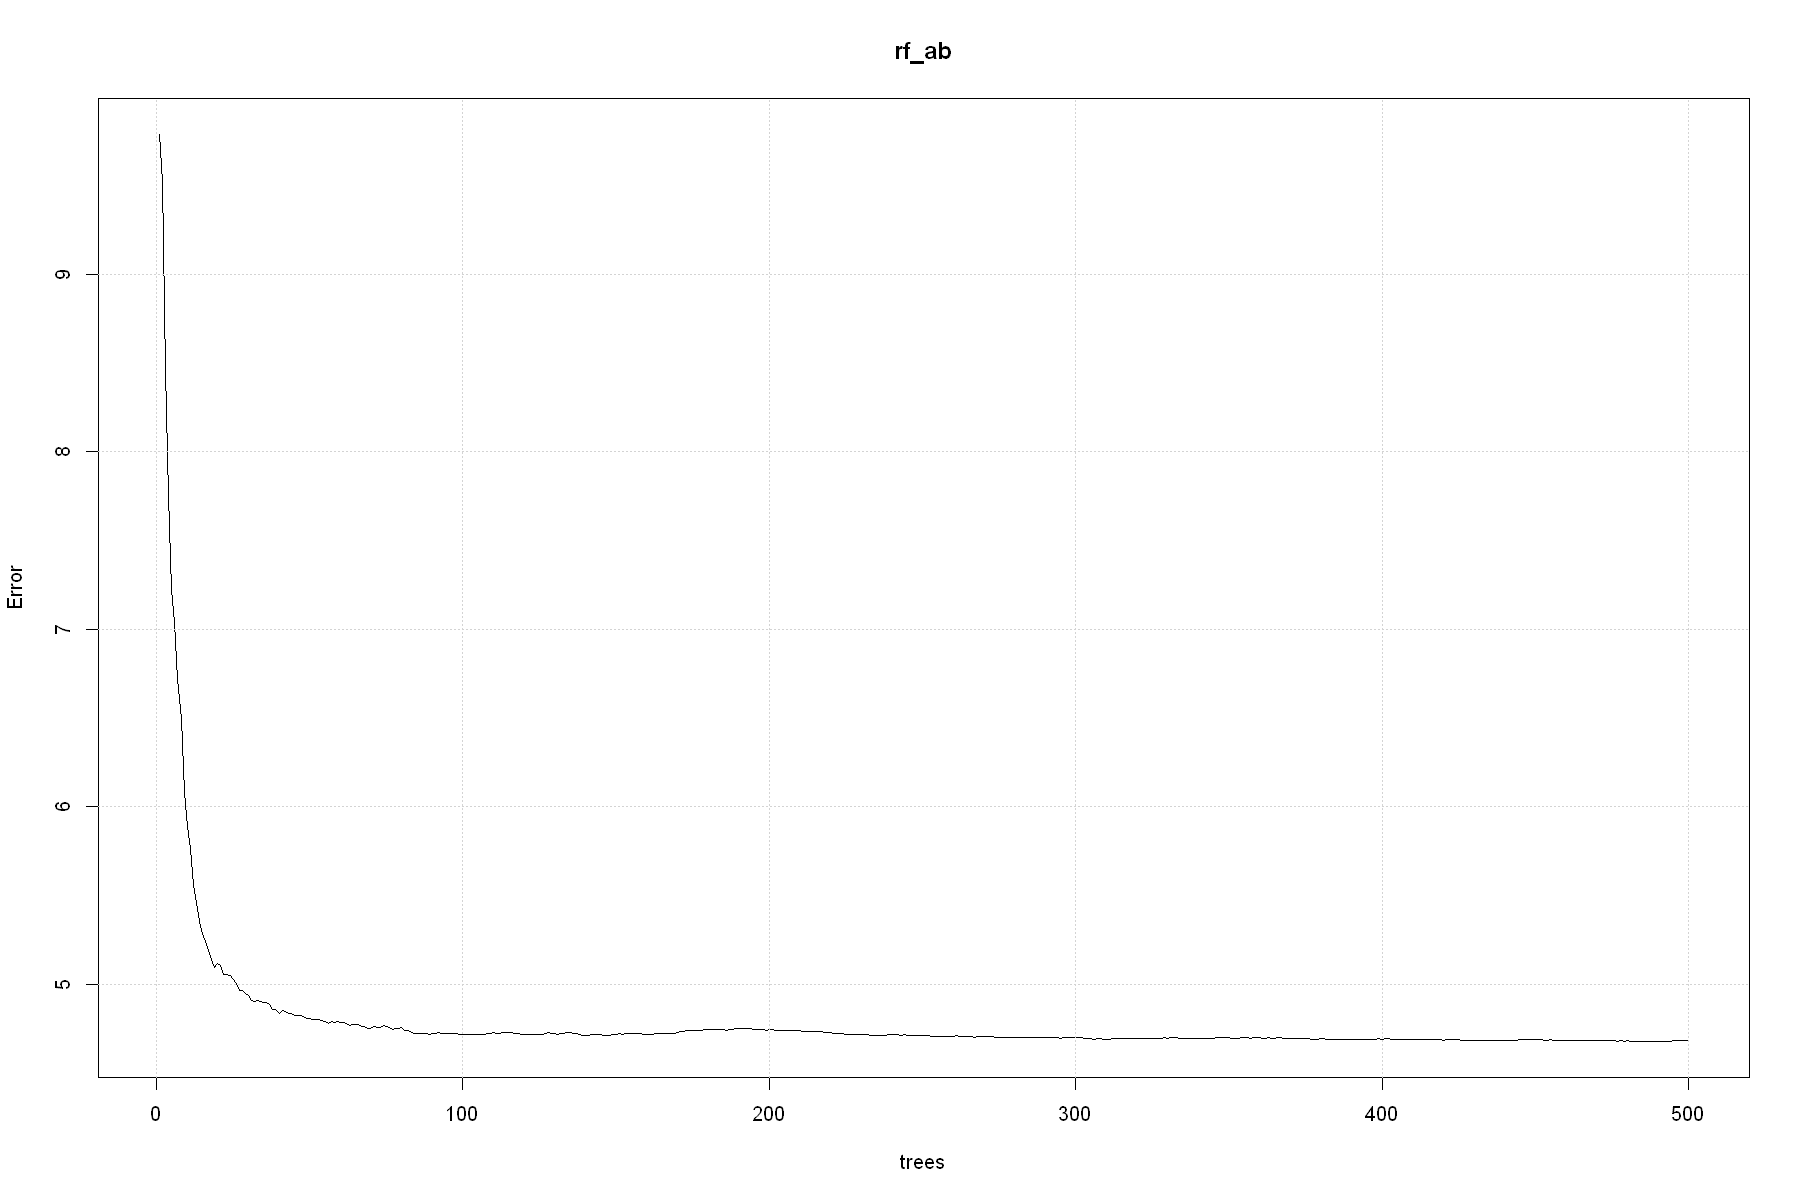

In [16]:
set.seed(71)
(rf_ab <-randomForest(Rings ~ ., data = train_ab, importance = TRUE, proximity = TRUE, localImp = TRUE)) #默认norm.votes=TRUE

plot(rf_ab)
grid()

In [17]:
#根据1-SE原则，最优cp=0.0097，参见https://github.com/A-Pai/rpart-solveing/blob/main/1-rpart.ipynb
rtabo <- rpart(Rings ~ .,data = train_ab, cp = 0.0097) 
#决策树的泛化性能
(MSE_test <- mean((predict(rtabo, test_ab) - test_ab$Rings)^2))    #测试集的MSE

#随机森林的泛化性能
(MSE_test_f <- mean((predict(rf_ab, test_ab)  - test_ab$Rings)^2))    #测试集的MSE
#可见随机森林的泛化性能优于决策树

[1] 5.631479

[1] 4.605458